#### some instructions:
1. External functions must have their own files .py and then imported in this main notebook
2. Upload notebook with cells already run before handing in the HW
3. Add to readme.md the link to the notebook as well

### Importing all necessary libraries

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import pearsonr
import statsmodels.api as sm
from decimal import Decimal
from scipy.stats import kruskal

## [RQ1] EDA of dataset
### Reading the dataset from csv file

In [8]:
df = pd.read_csv('dataset/steam_reviews.csv')

In [9]:
df.head()

,Unnamed: 0,app_id,app_name,review_id,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,...,steam_purchase,received_for_free,written_during_early_access,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
0,0,292030,The Witcher 3: Wild Hunt,85185598,schinese,不玩此生遗憾，RPG游戏里的天花板，太吸引人了,1611381629,1611381629,True,0,...,True,False,False,76561199095369542,6,2,1909.0,1448.0,1909.0,1.611343e+09
1,1,292030,The Witcher 3: Wild Hunt,85185250,schinese,拔DIAO无情打桩机--杰洛特!!!,1611381030,1611381030,True,0,...,True,False,False,76561198949504115,30,10,2764.0,2743.0,2674.0,1.611386e+09
2,2,292030,The Witcher 3: Wild Hunt,85185111,schinese,巫师3NB,1611380800,1611380800,True,0,...,True,False,False,76561199090098988,5,1,1061.0,1061.0,1060.0,1.611384e+09
3,3,292030,The Witcher 3: Wild Hunt,85184605,english,"One of the best RPG's of all time, worthy of a...",1611379970,1611379970,True,0,...,True,False,False,76561199054755373,5,3,5587.0,3200.0,5524.0,1.611384e+09
4,4,292030,The Witcher 3: Wild Hunt,85184287,schinese,大作,1611379427,1611379427,True,0,...,True,False,False,76561199028326951,7,4,217.0,42.0,217.0,1.610788e+09


### Starting EDA
##### Summary of dataset structure

In [42]:
df.shape

(21747371, 23)

In [7]:
# number of features, names, and dtypes
# total of each dtype and memory usage of df
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21747369 entries, 0 to 21747370
Data columns (total 23 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   Unnamed: 0                      int64  
 1   app_id                          int64  
 2   app_name                        object 
 3   review_id                       int64  
 4   language                        object 
 5   review                          object 
 6   timestamp_created               int64  
 7   timestamp_updated               int64  
 8   recommended                     bool   
 9   votes_helpful                   int64  
 10  votes_funny                     int64  
 11  weighted_vote_score             float64
 12  comment_count                   int64  
 13  steam_purchase                  bool   
 14  received_for_free               bool   
 15  written_during_early_access     bool   
 16  author.steamid                  int64  
 17  author.num_games_owned        

##### Summary statistics

In [8]:
# statistics of each feature of df
df.describe()

,Unnamed: 0,app_id,review_id,timestamp_created,timestamp_updated,votes_helpful,votes_funny,weighted_vote_score,comment_count,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
count,2.174737e+07,2.174737e+07,2.174737e+07,2.174737e+07,2.174737e+07,2.174737e+07,2.174737e+07,2.174737e+07,2.174737e+07,2.174737e+07,2.174737e+07,2.174737e+07,2.174737e+07,2.174737e+07,2.172169e+07,2.174737e+07
mean,1.087369e+07,3.928181e+05,5.187500e+07,1.544432e+09,1.547556e+09,4.044689e+05,1.267917e+05,1.654424e-01,1.308768e-01,7.656120e+16,1.011300e+06,4.044775e+05,1.609105e+04,1.555421e+02,8.807421e+03,1.580505e+09
std,6.277927e+06,2.480977e+05,2.084267e+07,5.812194e+07,5.689899e+07,1.333741e+09,2.333553e+07,2.434006e-01,2.199398e+00,3.179438e+08,2.108829e+09,1.333741e+09,3.743057e+04,7.300488e+02,2.388553e+04,4.676178e+07
min,0.000000e+00,7.000000e+01,4.300000e+01,1.290198e+09,1.290198e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.656120e+16,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
25%,5.436844e+06,2.427600e+05,3.639355e+07,1.510223e+09,1.511729e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.656120e+16,2.200000e+01,2.000000e+00,1.250000e+03,0.000000e+00,5.590000e+02,1.573329e+09
50%,1.087369e+07,3.595500e+05,5.384058e+07,1.562446e+09,1.572189e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.656120e+16,6.100000e+01,4.000000e+00,4.307000e+03,0.000000e+00,1.881000e+03,1.599058e+09
75%,1.631053e+07,5.780800e+05,6.928793e+07,1.589696e+09,1.591403e+09,1.000000e+00,0.000000e+00,4.827586e-01,0.000000e+00,7.656120e+16,1.450000e+02,1.000000e+01,1.491200e+04,0.000000e+00,6.823000e+03,1.609002e+09
max,2.174738e+07,1.291340e+06,8.521867e+07,1.611426e+09,2.283383e+09,4.398047e+12,4.294967e+09,9.959868e-01,4.893000e+03,7.656120e+16,4.398047e+12,4.398047e+12,3.744943e+06,2.703900e+04,3.228103e+06,1.611434e+09


##### Check for missing values per column in dataset

In [44]:
missing_values = df.isnull().sum()
missing_values[missing_values > 0]

review                            33748
author.playtime_forever               2
author.playtime_last_two_weeks        2
author.playtime_at_review         25682
author.last_played                    2
dtype: int64

##### Check for duplicates

In [45]:
# Making sure there are no duplicates in df 
df.duplicated().sum()

0

##### Dropping missing values for users who never played because their reviews do not interest us

In [10]:
# This also drops the author.playtime_last_two_weeks  author.playtime_at_review nan values as they are equal to 
# author.playtime_forever nan's values, and if a user never played, it means these 2 other values are gonna be nan too
df.dropna(subset=['author.playtime_forever'], inplace=True)

##### Imputing missing values for column reviews


In [11]:
# To avoid loss of information
df['review'].fillna(' ', inplace=True)

/var/folders/zf/wylf1g6j40g9pz8j5wtw1hhw0000gn/T/ipykernel_1246/2139766395.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['review'].fillna(' ', inplace=True)


##### Imputing missing values for author.playtime_at_review

In [12]:
# WOULD HAVE BEEN NICE TO Fill with average playtime at review of each different user to preserve the context of each user's behavior 
# to avoid loss of information BUT took too much time, so used mean for everyone e via
df['author.playtime_at_review'].fillna(df['author.playtime_at_review'].mean(), inplace=True)

/var/folders/zf/wylf1g6j40g9pz8j5wtw1hhw0000gn/T/ipykernel_1246/4115257975.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['author.playtime_at_review'].fillna(df['author.playtime_at_review'].mean(), inplace=True)


##### Visualization of distributions for numerical features of df

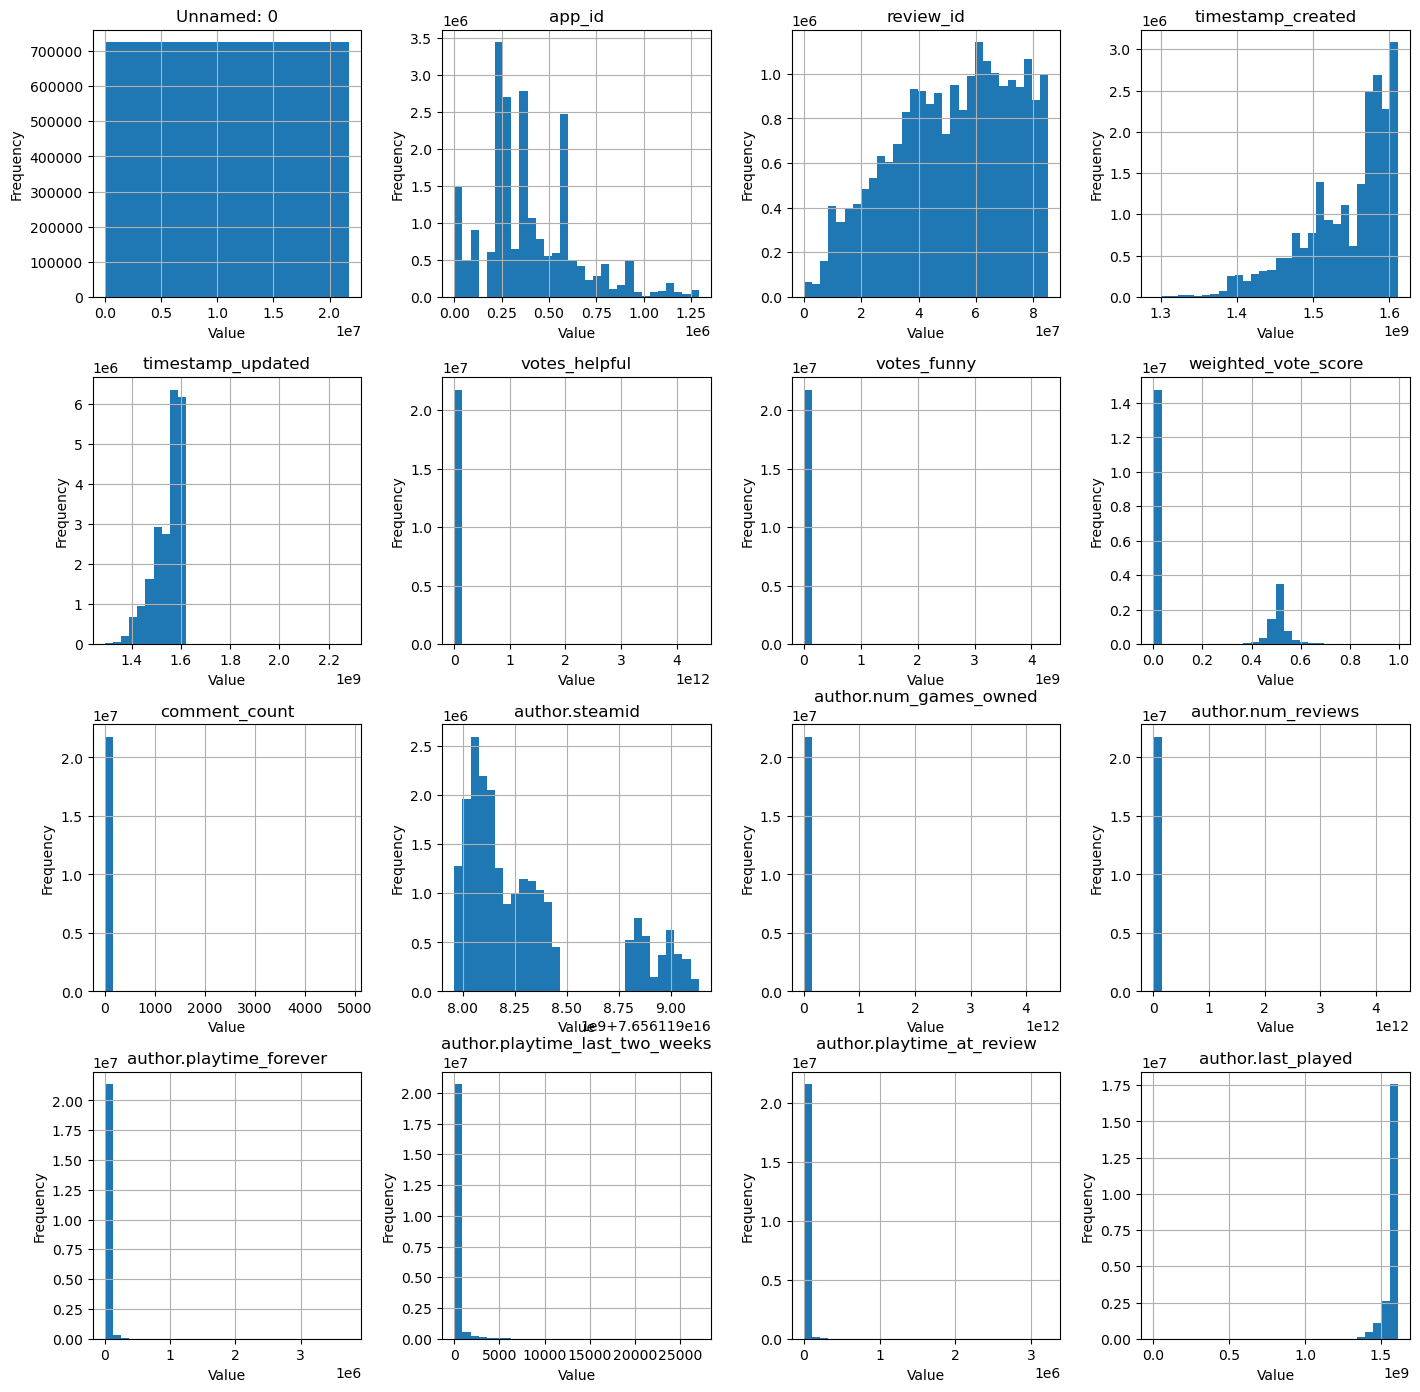

In [10]:
# Plot histograms for each column
axes = df.hist(figsize=(17, 17), bins=30)

# Setting labels for clarity
for ax in axes.flatten():
    ax.set_xlabel("Value")
    ax.set_ylabel("Frequency")  

plt.show()


##### Correlation heatmap for numerical features

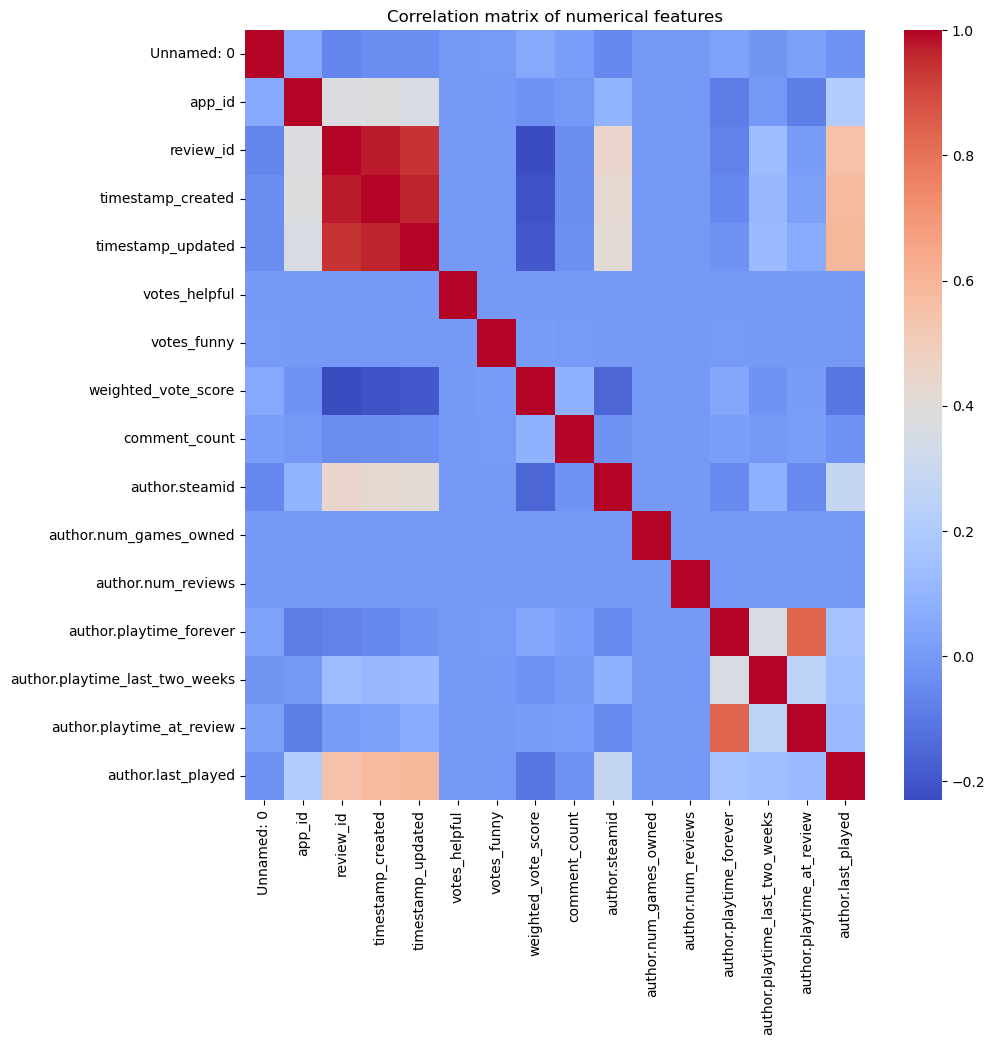

In [49]:
# taking only numeric features
numeric_df = df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(10, 10)) 
plt.title("Correlation matrix of numerical features")

sns.heatmap(numeric_df.corr(), annot=False, cmap='coolwarm')
plt.show()

##### Sns pairplot analysis for features that interest the analysis

In [7]:
# Sample df because execution time is very high
df_sample = df.sample(n=20000, random_state=42)

0.5949438524454083

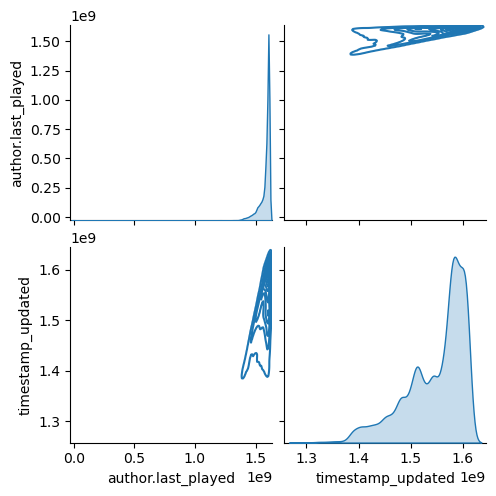

In [50]:
# analyse if when a user last played a game, he updated his review about it
sns.pairplot(df_sample, vars=['author.last_played', 'timestamp_updated'], kind='kde')
df['author.last_played'].corr(df['timestamp_updated']) # prints correlation value

##### Analysing recommendation rate per app

In [11]:
recommended = df.groupby('app_name')['recommended'].mean()
best = recommended.sort_values(ascending=False).head(10)

/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 65290 (\N{FULLWIDTH ASTERISK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


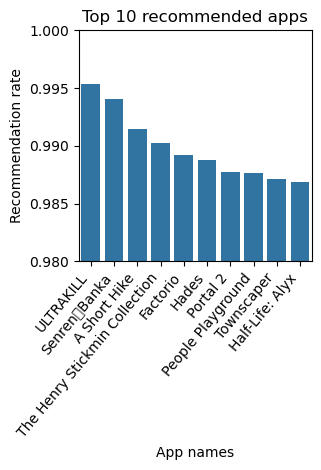

In [12]:
plt.figure(figsize=(3,3))
sns.barplot(x=best.index, y=best.values)
plt.title("Top 10 recommended apps")
plt.xticks(rotation=50, ha='right')
plt.ylim(0.98, 1)
plt.xlabel("App names")
plt.ylabel("Recommendation rate")
plt.show()

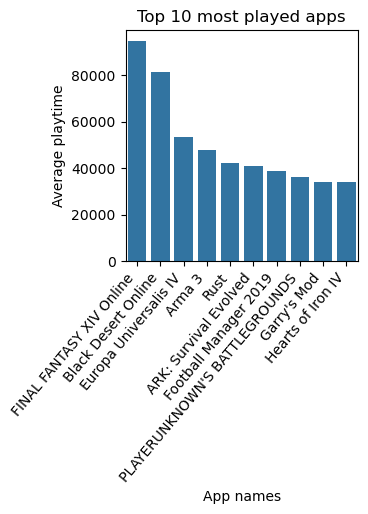

In [13]:
# Extract the most played apps
avg_playtime = df.groupby('app_name')['author.playtime_forever'].mean()
most_played = avg_playtime.sort_values(ascending=False).head(10)

plt.figure(figsize=(3,3))
sns.barplot(x=most_played.index, y=most_played.values)
plt.title("Top 10 most played apps")
plt.xticks(rotation=50, ha='right')
plt.xlabel("App names")
plt.ylabel("Average playtime")
plt.show()

##### Check if the more a user plays a game, the more he could recommend the game

Text(0.5, 1.0, 'Playtime vs. Recommendation')

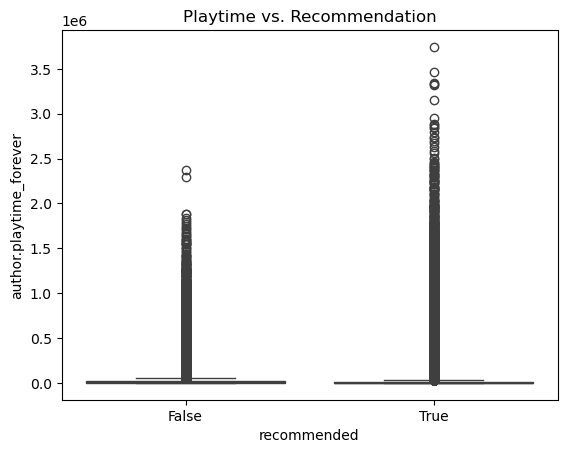

In [56]:
sns.boxplot(x='recommended', y='author.playtime_forever', data=df)
plt.title("Playtime vs. Recommendation")

/var/folders/zf/wylf1g6j40g9pz8j5wtw1hhw0000gn/T/ipykernel_2999/3608145016.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=review_counts.values, y=review_counts.index, palette="viridis")


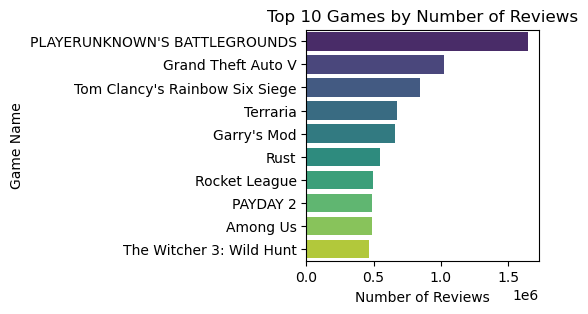

In [21]:
# count the reviews per game, and take the top 10 by review count
review_counts = df.groupby('app_name').size().sort_values(ascending=False).head(10)

# plot figure
plt.figure(figsize=(3, 3))
sns.barplot(x=review_counts.values, y=review_counts.index, palette="viridis")
plt.xlabel("Number of Reviews")
plt.ylabel("Game Name")
plt.title("Top 10 Games by Number of Reviews")
plt.show()

##### Check if most played, most recommended, or most reviewed games coincide

In [30]:
recommended_apps_set = set(best.index)
played_apps_set = set(most_played.index)
most_reviewed_set = set(review_counts.index)

# Find the common apps in different subsets
apps1 = recommended_apps_set.intersection(played_apps_set)
apps1 # Empty as the most recommended apps are not the most played apps

apps2 = recommended_apps_set.intersection(most_reviewed_set)
apps2 # Empty as the most recommended apps are not the most reviewed

apps3 = played_apps_set.intersection(most_reviewed_set)
print('Apps3')
apps3 # some most played apps are the most reviewed apps

Apps3


{"Garry's Mod", "PLAYERUNKNOWN'S BATTLEGROUNDS", 'Rust'}

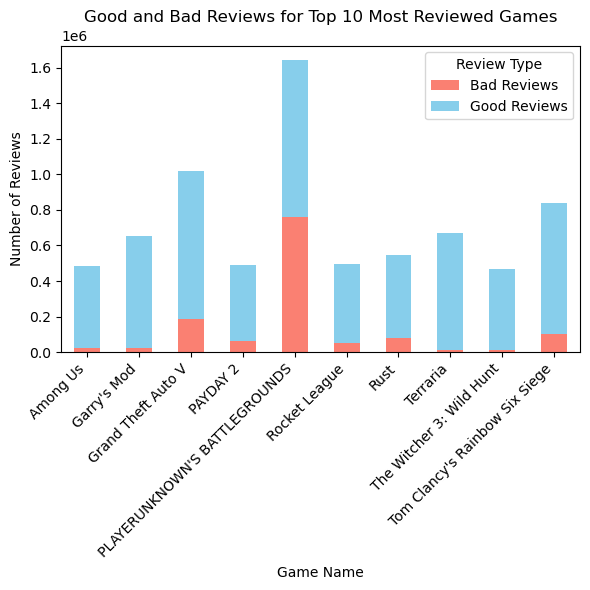

In [37]:
# Creating new df for top 10 most reviewed apps
top_10_df = df[df['app_name'].isin(review_counts.index)]

# Count Good and Bad Reviews for Each App in new df
good_bad_reviews = top_10_df.groupby(['app_name', 'recommended']).size().unstack(fill_value=0)
# Rename columns for clarity
good_bad_reviews.columns = ['Bad Reviews', 'Good Reviews']  

# Plotting figure
good_bad_reviews.plot(kind='bar', stacked=True, figsize=(6, 6), color=['salmon', 'skyblue'])
plt.xlabel("Game Name")
plt.ylabel("Number of Reviews")
plt.title("Good and Bad Reviews for Top 10 Most Reviewed Games")
plt.legend(title="Review Type")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## [RQ2] Analyzing the distribution of reviews across different applications.
### Applications with the highest and lowest number of reviews.

In [15]:
# group by app_name to count how many review_id (uniqes) are there

num_reviews = df.groupby('app_name')['review_id'].count().reset_index(name='review_num')

highest_app = num_reviews.loc[num_reviews['review_num'].idxmax()]
lowest_app = num_reviews.loc[num_reviews['review_num'].idxmin()]

print(f"Application with the highest number of reviews:\n\n {highest_app}\n\n")
print(f"Application with the lowest number of reviews:\n\n {lowest_app}")


Application with the highest number of reviews:

 app_name      PLAYERUNKNOWN'S BATTLEGROUNDS
review_num                          1644255
Name: 182, dtype: object


Application with the lowest number of reviews:

 app_name      Neon Hardcorps
review_num               200
Name: 164, dtype: object


### Plot of the number of reviews for each application in descending order

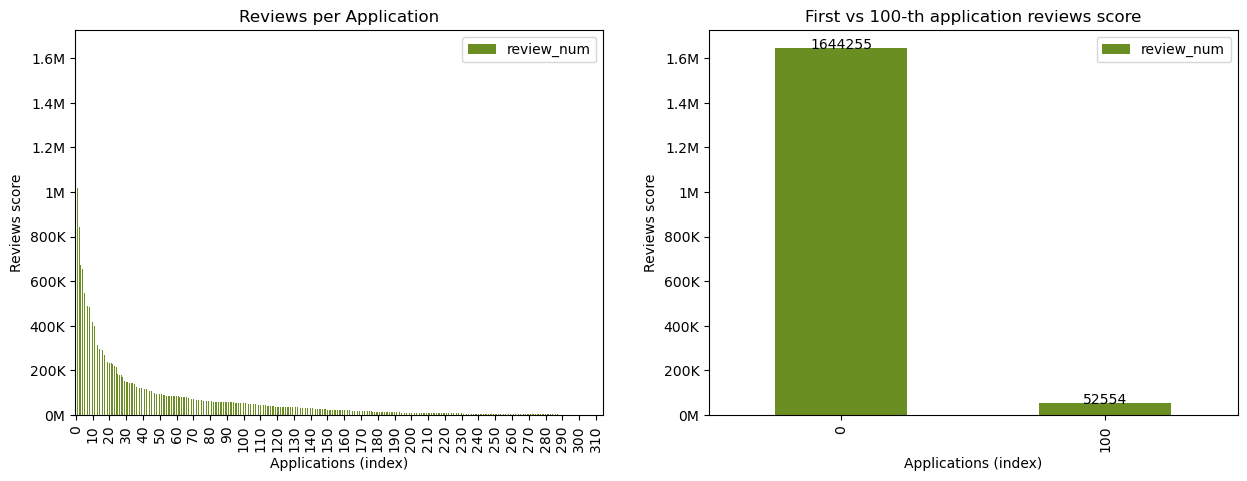

In [16]:
# sorted applications by number of reviews
num=num_reviews.sort_values( by = 'review_num', ascending = False ).reset_index(drop = True)

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

num.plot(kind='bar',
         y='review_num',  # 'app_name' is no longer on the x-axis, just the index
         color='olivedrab', 
         xlabel='Applications (index)', 
         ylabel='Reviews score', 
         title='Reviews per Application', 
         ax=axes[0]
         )


axes[0].set_xticks(range(0, len(num), 10))  # Set ticks at intervals of 10
axes[0].set_xticklabels(range(0, len(num), 10))  # Label the ticks with index numbers
axes[0].set_yticks(np.arange(0, 1.8e6, 0.2e6)) 
axes[0].set_yticklabels(['0M', '200K', '400K', '600K', '800K', '1M', '1.2M', '1.4M', '1.6M'])


# zooming in on the first and 100-th applications
num.iloc[[0,100]].plot(kind='bar',
         y='review_num',  
         color='olivedrab', 
         xlabel='Applications (index)', 
         ylabel='Reviews score', 
         title='First vs 100-th application reviews score',
         ax = axes[1])

axes[1].text(0, num['review_num'][0], num['review_num'][0], ha = 'center')
axes[1].text(1, num['review_num'][100], num['review_num'][100], ha = 'center')
axes[1].set_yticks(np.arange(0, 1.8e6, 0.2e6)) 
axes[1].set_yticklabels(['0M', '200K', '400K', '600K', '800K', '1M', '1.2M', '1.4M', '1.6M'])


plt.show()


This bar plot suggests a high imbalance in the review counts distribution: 

- only the first (sorted) 11 applications, that is the 3,5 % of the total, have a number of applications greater or equal then 400000;

- 285 applications, that is the 90,8 % of the total, count a number of applications smaller then 200000;

- as highlighted in the zoomed plot, by the $100^{th}$ application, the review scores are less then the 3,2% of those belonging to first application.

Such insights suggest that the distribution of the number of reviews follows a long-tailed pattern, where review counts exponentialy decay as the number of applications increases. 


The inequality highlights the dominance of a few key apps in attracting user attention, with the top 5 apps accounting for a substantial share of total reviews, as shown below.

### Percentage breakdown for the top five most reviewed applications: purchased vs received for free

In [17]:
# selecting only the rows in df whose app_name is in the top 5 most reviews and adding the review_num column merging on app
df_5 = pd.merge(df, num[:5], on = 'app_name', how = 'inner')

In [18]:
# counting the purchased apps and the got for free ones by summing true values, grouping by app
purchased = df_5.groupby('app_name')['steam_purchase'].sum().reset_index(name='purchased_tot')
for_free = df_5.groupby('app_name')['received_for_free'].sum().reset_index(name='for_free_tot')

#merging to add the column in the respective app_name row
df_5 = pd.merge(df_5, purchased, on='app_name', how='left')
df_5 = pd.merge(df_5, for_free, on='app_name', how='left')


In [19]:
df_5['purchased_percent'] = round((df_5['purchased_tot'] / df_5['review_num']) * 100, 2)
df_5['for_free_percent'] = round((df_5['for_free_tot'] / df_5['review_num']) * 100, 2)

In [20]:
# select only the unique ones
df_5 = df_5.drop_duplicates(subset = ['app_name'])
df_5[['app_name', 'purchased_percent', 'for_free_percent' ]]

,app_name,purchased_percent,for_free_percent
0,Garry's Mod,84.09,3.78
655524,Tom Clancy's Rainbow Six Siege,83.44,4.31
1497442,Grand Theft Auto V,88.83,3.79
2516558,PLAYERUNKNOWN'S BATTLEGROUNDS,83.49,3.74
4160813,Terraria,78.44,3.00


For the top five applications by number of reviews, the majority of reviews — an average of 83.67% — were submitted by users who purchased the application.

The percentages of purchases and applications received for free do not sum to 100% because there are users who neither purchased the application on Steam nor obtained it for free. This gap represents a category we will refer to as 'Unknown.'

The following plot illustrates the average breakdown.

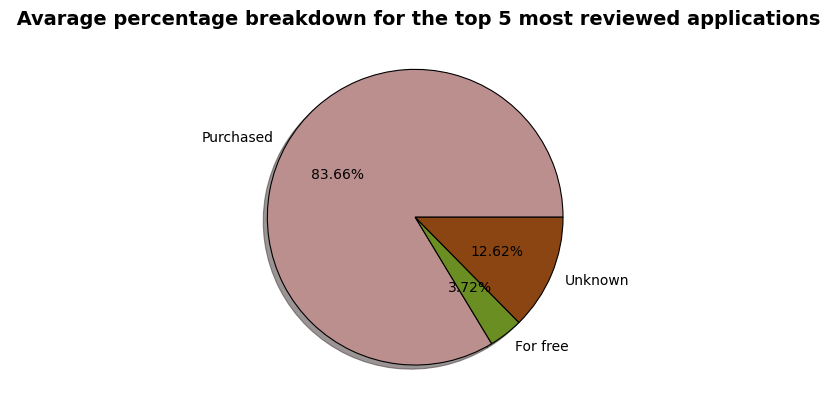

In [21]:
data = [df_5['purchased_percent'].mean(),
      df_5['for_free_percent'].mean(),
      100 - df_5['purchased_percent'].mean()- df_5['for_free_percent'].mean() ]

labels = ['Purchased', 'For free', 'Unknown'] 
plt.title(' Avarage percentage breakdown for the top 5 most reviewed applications', fontsize=14, weight='bold')

plt.pie(data, labels = labels, colors = ['rosybrown', 'olivedrab', 'saddlebrown'],
        autopct='%1.2f%%', shadow=True, wedgeprops = {"edgecolor" : "black",'linewidth': 0.8})
plt.show()


### Applications with the most and least user recommendations.

In [22]:
# group by app_name to count how many review_id (uniqes) are there

recommendations = df.groupby('app_name')['recommended'].count().reset_index(name='recommendations_no')

most_recommended = recommendations.loc[recommendations['recommendations_no'].idxmax()]
least_recommended = recommendations.loc[recommendations['recommendations_no'].idxmin()]

print(f"Application with the highest number of recommendations:\n\n {most_recommended}\n\n")
print(f"Application with the lowest number of recommendations:\n\n {least_recommended}")

Application with the highest number of recommendations:

 app_name              PLAYERUNKNOWN'S BATTLEGROUNDS
recommendations_no                          1644255
Name: 182, dtype: object


Application with the lowest number of recommendations:

 app_name              Neon Hardcorps
recommendations_no               200
Name: 164, dtype: object


The most recommended application is the one having the highest number of reviews.

Similarly, the least recommended one is the application with the lowest number of reviews. 

This leads to the hipotesis that the two variables grow with eachother.

### Correlation between the number of recommendations and the applications' review scores

To assess the relationship between application review scores and the number of recommendations for each application, we first define 'review score' as the avarage weighted_vote_score for each application, which expresses on avarage the helpfulness of the reviews for each application.

Then, we compute its correlation with the recommendations ratio, as a measure of the likelihood of a recommendation, and with the recommendations number for each application.

Finally we test wether the results are statistically significant.


In [23]:
# defining review scores as avg vote score per app
app_review_score = df.groupby('app_id')['weighted_vote_score'].mean()

# Total number of recommendations per app
app_total_recommendations = df.groupby('app_id')['recommended'].sum()

# Recommendation ratio per app
app_recommendation_ratio = df.groupby('app_id')['recommended'].mean()


app_metrics_df = pd.DataFrame({
    'Review Score': app_review_score,
    'Total Recommendations': app_total_recommendations,
    'Recommendation Ratio': app_recommendation_ratio
}).reset_index()

print(app_metrics_df.head())

   app_id  Review Score  Total Recommendations  Recommendation Ratio
0      70      0.162398                  55312              0.964969
1     240      0.182693                 113430              0.960612
2     420      0.172643                  22704              0.966128
3     620      0.128700                 229470              0.987694
4    2870      0.380447                   2970              0.424225


In order to choose the most appropriate correlation measure and statistical test, we first visualize the relationship between the two pairs of variables with a scatterplot:

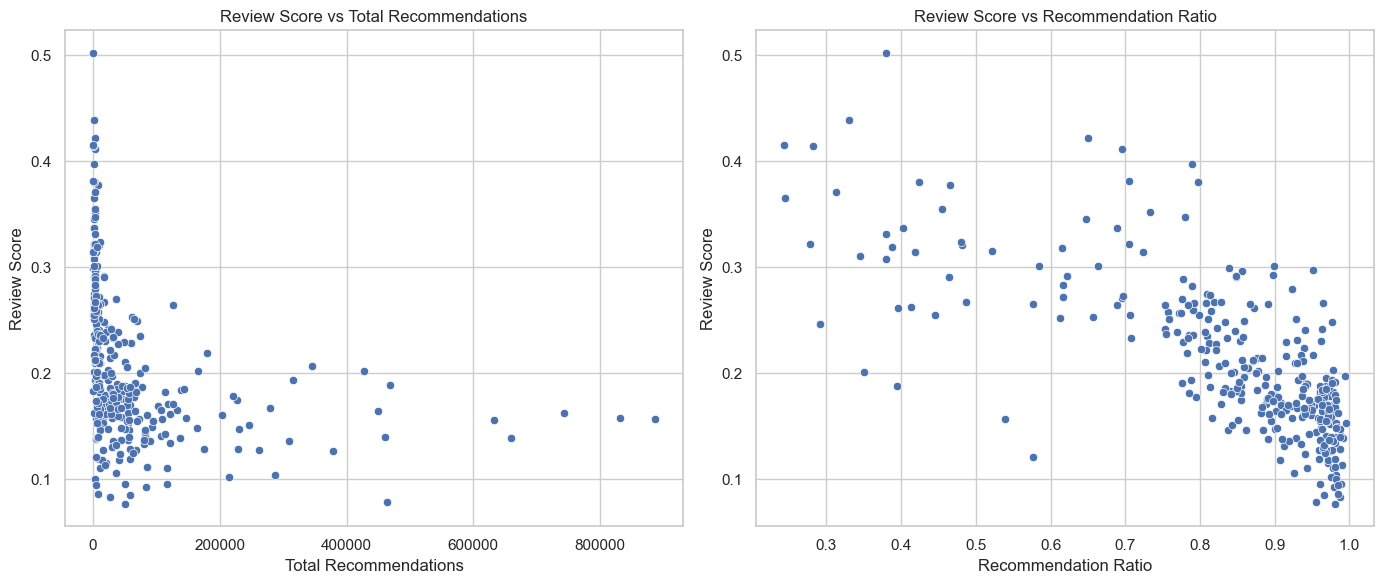

In [ ]:
sns.set(style="whitegrid")

fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Scatter plot for Review Score vs Total Recommendations
sns.scatterplot(data=app_metrics_df, x='Total Recommendations', y='Review Score', ax=axs[0])
axs[0].set_title('Review Score vs Total Recommendations')
axs[0].set_xlabel('Total Recommendations')
axs[0].set_ylabel('Review Score')

# Scatter plot for Review Score vs Recommendation Ratio
sns.scatterplot(data=app_metrics_df, x='Recommendation Ratio', y='Review Score', ax=axs[1])
axs[1].set_title('Review Score vs Recommendation Ratio')
axs[1].set_xlabel('Recommendation Ratio')
axs[1].set_ylabel('Review Score')

plt.tight_layout()
plt.show()

The relationship between Review Score and Total Recommendations appears non-linear, with most data points clustered at lower values of Total Recommendations and a few outliers extending to very high values.
Given the skew and non-linear distribution, Spearman’s Rank Correlation would be more appropriate than Pearson’s correlation because these tests are non-parametric and don’t assume linear relationships.

The plot between Review Score and Recommendation Ratio shows a more dispersed, possibly monotonic pattern, with a tendency for Review Score to decrease as Recommendation Ratio increases. This pattern also suggests a non-linear or monotonic relationship.
Here, Spearman’s Rank Correlation would also be suitable, as these methods handle monotonic relationships well without assuming normality.

In [32]:
from scipy.stats import spearmanr

# Correlation between Review Score and Recommendation Ratio
# wether the weighted helpfulness score (average weighted_vote_score) is related to the likelihood of a recommendation, as measured by the ratio.

s_corr_ratio, s_p_value_ratio = spearmanr(app_metrics_df['Review Score'], app_metrics_df['Recommendation Ratio'])
print(f"Spearman correlation between Review Score and Recommendation Ratio: {s_corr_ratio}, P-value: {s_p_value_ratio}")

# Correlation between Review Score and Total Recommendations
# wether apps with higher helpfulness scores receive more total recommendations.

s_corr_total, s_p_value_total = spearmanr(app_metrics_df['Review Score'], app_metrics_df['Total Recommendations'])
print(f"Correlation between Review Score and Total Recommendations: {s_corr_total}, P-value: {s_p_value_total}")

Spearman correlation between Review Score and Recommendation Ratio: -0.7495509918875234, P-value: 4.960639882400314e-58
Correlation between Review Score and Total Recommendations: -0.6258916454440435, P-value: 1.1618128912072842e-35


### Interpretation of the results:

In both cases we achieve a statistically significant negative correlation.

#### Review Score vs Recommendation Ratio:
Correlation Coefficient: $-0.75$, which suggests a strong negative correlation. This means that as the recommendation ratio increases (the more an application is recommended), the review score tends to decrease (the less its revews are voted as helpful), indicating an strong monotonic relationship.

P-value: $ 4.96$ x $10^{-58}$, which is extremely small, indicating that the correlation is statistically significant. This means the observed correlation is very unlikely to be due to random chance.

#### Review Score and Total Recommendations:

Correlation Coefficient: $-0.626$, indicating a moderate negative correlation. This suggests that as the total number of recommendations increases, the review score tends to decrease.

P-value: $ 1.162$ x $10^{-35}$, also indicating statistical significance. 

The strong negative correlation between the review score and the recommendation ratio suggests that higher recommendation ratios may be associated with lower review scores. This implies that reviews reguarding higlhly recommended applications may not be rated highly.
The moderate negative correlation between the review score and total recommendations suggests that apps with a large number of recommendations do not necessarily have high review scores, possibly because higher popularity could bring more critical reviews.

## [RQ3] Understanding when users are most active in submitting reviews can help identify peak engagement periods.

### Number of reviews submitted each month

In [ ]:
# converting timestamps into date and time format: YYYY-MM-DD HH:MM:SS
# and adding it as a new column

df['date_time'] = pd.to_datetime(df['timestamp_created'], unit='s')

# creating new columns to store the month and year from date_time
#importing calendar to later convert months indexes into months names

import calendar

df['month_num'] = df['date_time'].dt.month
df['year'] = df['date_time'].dt.year

# First we create a new dataframe with the columns 'year', 'month_num' and 'reviews_per_month_and_year'
# obtained from the original df DataFrame, grouping by 'year' first, 'month' second
# and using the .count aggregate operator to count how many reviews per month were submitted in every year
# we used 'review_id' values to count since they are uniques

reviews_per_month_and_year = df.groupby(['year', 'month_num'])['review_id'].count().reset_index(name = 'reviews_per_month_and_year')

# sorting by years and month_num
reviews_per_month_and_year  = reviews_per_month_and_year.sort_values(by = ['year', 'month_num'])

reviews_per_month_and_year

,year,month_num,reviews_per_month_and_year
0,2010,11,555
1,2010,12,1818
2,2011,1,824
3,2011,2,577
4,2011,3,591
...,...,...,...
118,2020,9,595259
119,2020,10,639716
120,2020,11,941891
121,2020,12,739407


As emerged from this output, the dataset's collection period began in November 2010 (month_num = 11) and concluded in January 2021 (month_num = 1).

As a result, the distribution of review counts for the first and last years is incomplete and skewed toward zero due to the absence of data for the full year.

To ensure the accuracy of our analysis, we will exclude these partial-year values from the final evaluation.

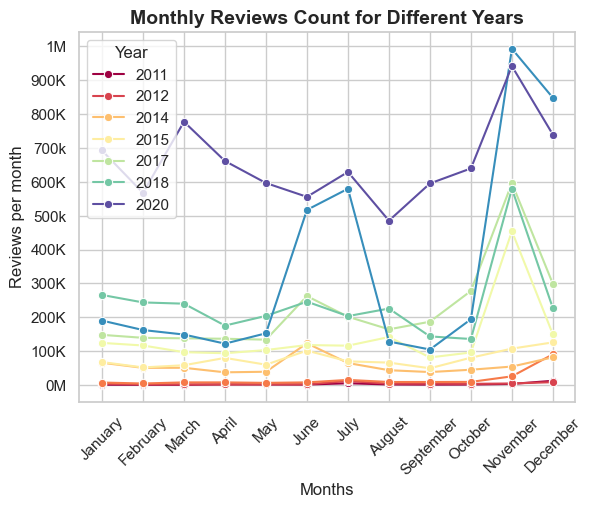

In [34]:
# plot of the trend of review scores by month for each year from 2011 to 2020:

sns.lineplot( data = reviews_per_month_and_year.iloc[2:-1], x= 'month_num', y = 'reviews_per_month_and_year', marker = 'o', hue = 'year', palette = 'Spectral' )
plt.xlabel('Months')
plt.ylabel('Reviews per month')
plt.grid(True)
plt.legend(title = 'Year')
plt.title('Monthly Reviews Count for Different Years', fontsize=14, weight='bold')

#converting months' indexes to their actual names and adjusting the fit:

plt.xticks(ticks=range(1, 13), labels=calendar.month_name[1:])
plt.xticks(rotation=45)

# improving y axis tik frequency:

plt.yticks(ticks=np.arange(0, 1.1e6, 0.1e6), labels=['0M', '100K', '200K', '300K', '400K', '500k', '600K', '700k', '800K', '900K', '1M'])
plt.show()

In earlier years, such as 2011 and 2012, the review activity is more steady across months, without sharp increases in any specific season, and the number of reviews per month is quite low.
There is a notable increase in reviews starting from 2017, peaking in 2020, suggesting a growing user base or increasing activity in more recent years.

A clear increase in reviews in November and December can be seen across all years. This could be attributed to holiday season sales (like Black Friday, Christmas discounts, and end-of-year promotions), when people tend to purchase more games and leave reviews.
There is also a secondary peak around July in certain years, which could align with summer sales or holiday periods where users have more time to engage with games.

The activity tends to drop in January after the high in November and December. This is consistent with post-holiday trends when fewer purchases are made after the end-of-year shopping rush.
Steady Activity for Older Years:

The dataset indicates seasonal trends in user review activity, particularly a strong peak in November and December. This suggests that holiday season promotions and sales events likely drive more purchases and thus more reviews. The summer months (June to August) also show some increased activity, potentially related to summer sales. Over time, review activity has significantly grown, especially post-2017, with the largest spike seen in 2020.

### Seasonal Patterns and Trends

Using seasonal decomposition to identify the underlying trend and seasonal patterns suggested by the previous analysis.

Assumption: the observed time series follows an additive model:
$$ Observed = Trend + Seasonal + Residual $$


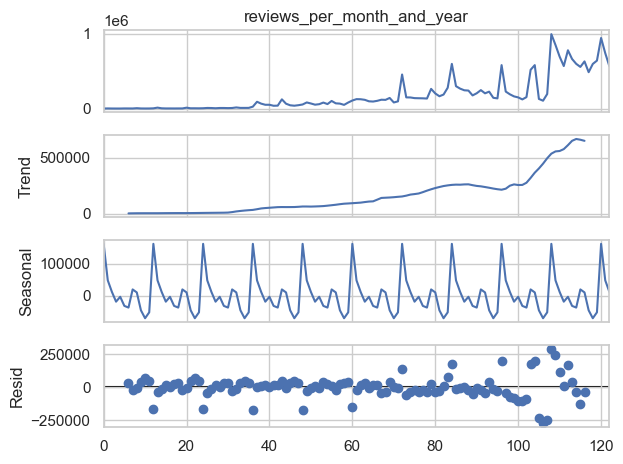

In [35]:
# install statsmodels first
from statsmodels.tsa.seasonal import seasonal_decompose

# creating a column (our tme series) in the format YYYY-MM-DD, where the day is set to 1

reviews_per_month_and_year['date'] = pd.to_datetime(
    {
        'year': reviews_per_month_and_year['year'],
        'month': reviews_per_month_and_year['month_num'],
        'day': 1
    }
)

# perform seasonal decomposition
decomposition = seasonal_decompose(reviews_per_month_and_year['reviews_per_month_and_year'], model='additive', period=12)

# plot the decomposition
decomposition.plot()
plt.show()

This decomposition allows a better understanding of the changes in review activity across the year, from 2010 to 2020, measured as the total number of reviews.

The trend component shows the long-term progression. The plot indicates a steady increase in the number of reviews over time, possibly due to increased user engagement, app popularity, or other factors contributing to a steady rise in reviews.

The seasonal component captures repeating patterns within each year. It looks like there's a clear, cyclic pattern every 12 months,  with peaks and troughs occurring consistently at certain intervals, meaning the number of reviews fluctuates seasonally. Combining this result with the lineplot 'Monthly Reviews Counts for different years' we are more convinced of the pattern: increasing activity from May to July, decreasing from July to August. Pick of activity in November and subsequential decrease in the following months. 

Lastly, the residual component looks random and scattered around zero, although there is a slight increase in variance toward the end. This could mean that recent months have more irregularity in review activity, describing the unpredictable variations of our model.

### Engagement Rates

In [36]:
#defining engagement rates as the number of reviews per month divided by the total number of reviews for that year

monthly = df.groupby(['year', 'month_num']).size().reset_index(name='monthly_reviews')
annual = df.groupby('year')['review_id'].count().reset_index(name='annual_reviews')

monthly_engagement = monthly.merge(annual, on='year')

monthly_engagement['engagement_rate'] = monthly_engagement['monthly_reviews'] / monthly_engagement['annual_reviews']

monthly_engagement

,year,month_num,monthly_reviews,annual_reviews,engagement_rate
0,2010,11,555,2373,0.233881
1,2010,12,1818,2373,0.766119
2,2011,1,824,31018,0.026565
3,2011,2,577,31018,0.018602
4,2011,3,591,31018,0.019053
...,...,...,...,...,...
118,2020,9,595259,7882424,0.075517
119,2020,10,639716,7882424,0.081157
120,2020,11,941891,7882424,0.119493
121,2020,12,739407,7882424,0.093805


/var/folders/zf/wylf1g6j40g9pz8j5wtw1hhw0000gn/T/ipykernel_1045/1560322003.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=monthly_engagement, x='month_num', y='engagement_rate', palette="Blues", ax=ax2)


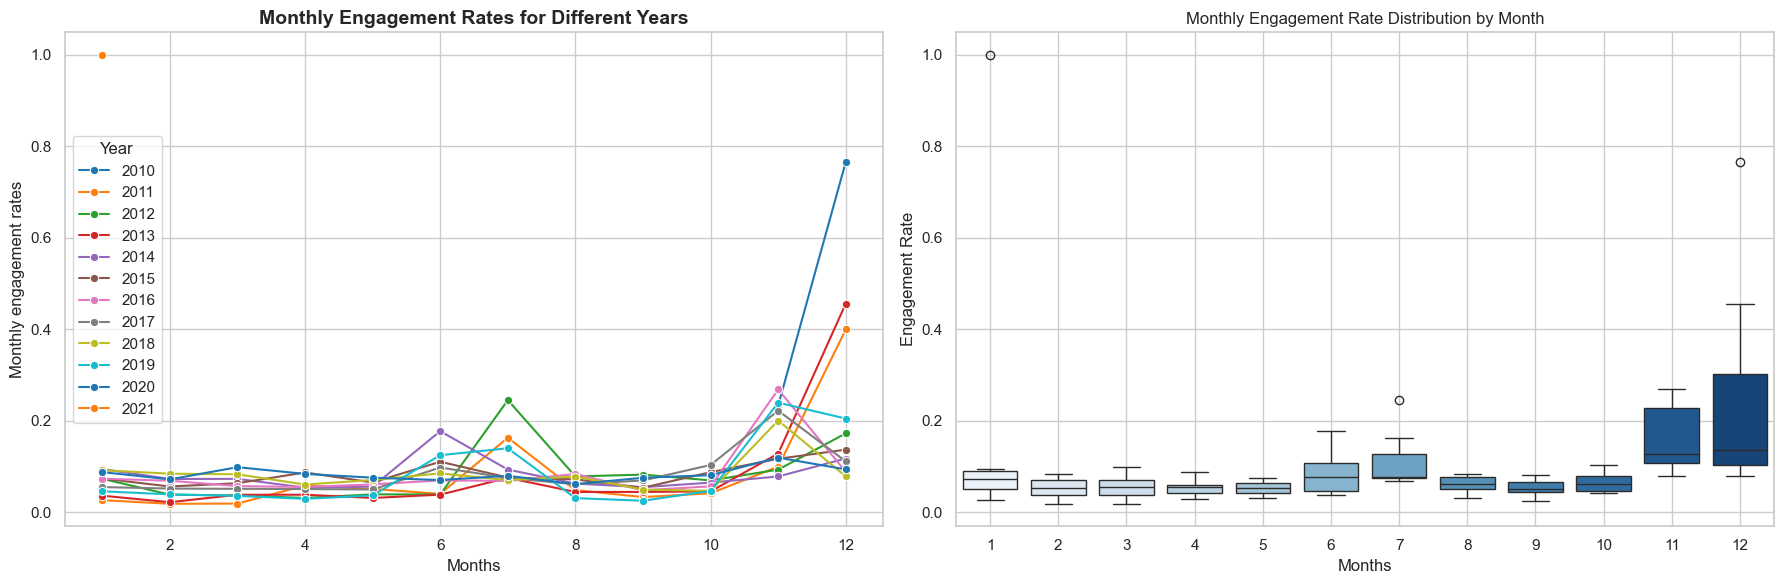

In [37]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# Line plot to check spikes

sns.lineplot( data = monthly_engagement, x= 'month_num', y = 'engagement_rate', marker = 'o', hue = 'year', palette = 'tab10', ax=ax1 )
ax1.set_title('Monthly Engagement Rates for Different Years', fontsize=14, weight='bold')
ax1.set_xlabel('Months')
ax1.set_ylabel('Monthly engagement rates')
ax1.grid(True)
ax1.legend(title = 'Year')

#Box plot to check variability and statistical summaries

sns.boxplot(data=monthly_engagement, x='month_num', y='engagement_rate', palette="Blues", ax=ax2)
ax2.set_title('Monthly Engagement Rate Distribution by Month')
ax2.set_xlabel('Months')
ax2.set_ylabel('Engagement Rate')
ax2.grid(True)

plt.tight_layout()
plt.show()

The line plot shows higher engagement rates in July, November and December, replicating a similar trend and seasonal pattern to what we observed with review activity. 

The blox plot higlights variability of engagement rates across the years.

Narrower boxes (e.g., in months 2–5) suggest less variability in engagement rates for those months, indicating that engagement was more consistent across different years.

Wider boxes, like those in months 6, 7, 11, and especially 12, indicate greater variability in engagement rates across different years.


The box for December shows a noticeable increase in engagement rates with a higher median and greater spread. This likely reflects seasonal patterns, such as holiday sales and vacations when users are more active in leaving reviews.
There’s also an increase in engagement rates during the summer, although less pronounced than December. This may indicate a moderate seasonal effect, as people might be more engaged with gaming during breaks or summer sales.

Outliers are marked with circles, showing that some years had unusually high engagement rates in certain months (e.g., January and July).

### Most common time of day for users to write reviews

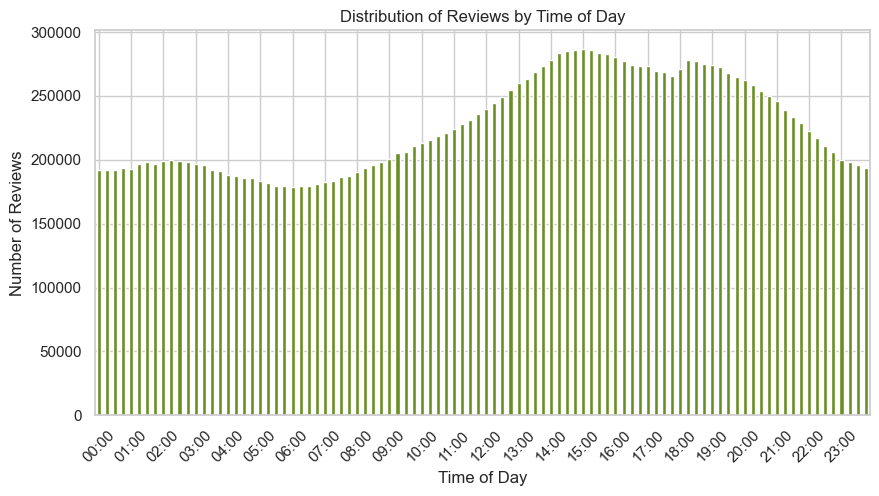

In [38]:
# Getting time only from date_time column while approximating 

df['time_bin'] = df['date_time'].dt.floor('15min').dt.time  

# Group by time_bin to count reviews at each 15-minute interval

time_counts = df.groupby('time_bin').size()

# Plotting

plt.figure(figsize=(10, 5))
time_counts.plot(kind='bar', color= 'olivedrab')  
plt.xlabel('Time of Day')
plt.ylabel('Number of Reviews')
plt.title('Distribution of Reviews by Time of Day')
xticks = range(0, len(time_counts), 4)  # Display hours only
plt.xticks(ticks=xticks, labels=[time_counts.index[i].strftime('%H:%M') for i in xticks], rotation=45)
plt.grid(True)
plt.show() 

This histogram shows the distribution of review submissions by time of the day, with each bin representing one quarter of an hour (from 0 to 23).

There is a noticeable peak in review activity around midday to early evening. The highest activity appears to be between 13 and 16, indicating that users are most active in writing reviews during this period.

Activity is lower from late night through early morning, especially around 2 AM to 7 AM. This is a common pattern as people are generally less active online during these hours, possibly sleeping or involved in offline activities.

The activity seems to gradually increase starting in the early morning and continues to build until it peaks in the afternoon, around 3 PM. After the peak period, activity declines slowly until it reaches a second pick around 6.30 PM, which may reasonably reflect an increase in users' activity due to the end of working hours. The number of reviews declines again towards the late evening, reflecting typical daily routines.

In [39]:
#computing the exact most common time

df['review_time'] = df['date_time'].dt.strftime('%H:%M')
most_common_time = df['review_time'].mode()[0]
print(f"The most common time of day for writing reviews is: {most_common_time}")

The most common time of day for writing reviews is: 14:50


The most common time of the day for writing reviews falls perfectly in the highest pick of the review activity histogram 'Distribution of Reviews by Time of Day'.

### Time Interval Analysis

In [53]:
#TO RERUN: i changed the plot

# defining a function which takes a list of time intervals and plots the number of reviews for each interval

df['review_time'] = df['date_time'].dt.time

def reviews_per_interval(time_intervals):
    
    out = []
    
    for interval in time_intervals:
        
        #converting input to datetime obj:
        start = pd.to_datetime(interval[0], format='%H:%M:%S').time()
        end = pd.to_datetime(interval[1], format='%H:%M:%S').time()

        reviews = df[(df['review_time'] >= start) & (df['review_time'] <= end)].shape[0]
        
        out.append([f"{start} - {end}", reviews])
        
    out_df = pd.DataFrame(out, columns = ['Time Interval', 'Number of Reviews'])


    # plot

    plt.figure(figsize=(8, 6))
    sns.barplot(data=out_df, y='Time Interval', x='Number of Reviews', palette='viridis')
    plt.xlabel('Number of Reviews')
    plt.ylabel('Time Interval')
    plt.title('Number of Reviews per Time Interval')
    plt.grid(axis='x')
    plt.show()

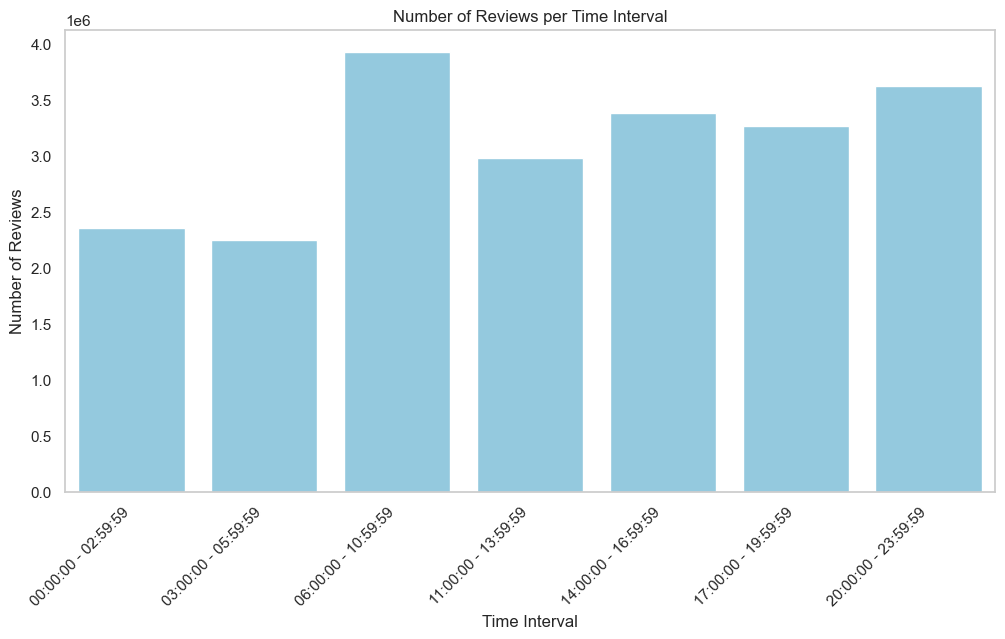

In [54]:
#TO RERUN
#testing the function on the  given input list of time intervals

#input_list = [['00:00:00','02:59:59'],['03:00:00','05:59:59'],['06:00:00','10:59:59'],
#['11:00:00','13:59:59'],['14:00:00','16:59:59'],['17:00:00','19:59:59'],['20:00:00','23:59:59']]

reviews_per_interval([['00:00:00','02:59:59'],['03:00:00','05:59:59'],['06:00:00','10:59:59'],
['11:00:00','13:59:59'],['14:00:00','16:59:59'],['17:00:00','19:59:59'],['20:00:00','23:59:59']])

Based on the time interval analysis results, we can summarize the review activity across different periods of the day:

Early Morning and Late Evening are peak times for review activity, suggesting users are most active during these hours.
Early Morning (03:00 - 05:59) sees the least activity, likely because of typical sleep patterns.
Afternoon and Evening also show moderate to high review activity, potentially aligning with breaks or end-of-day routines.

## [RQ4] Investigating whether users who spend more time using an application give higher or lower ratings.

In [ ]:
columns_to_read = [
    'review_id',
    'app_id',
    'review',
    'recommended',
    'weighted_vote_score',
    'author.steamid',
    'author.playtime_forever'
]

author_df = df[columns_to_read]

# four scenarios considered to calculate the user's review score for an app
# a user who provided review and recommended the app - assigned a weight of 7
# a user who provided review and didn't recommend the app - assigned a weight of 2
# a user who didn't provide both review and hasn't recommended the app - assigned a weight of 1
# a user who didn't provide review but has recommended the app - assigned a weight of 5

# the review score is calculated using the assigned weight from the above scenarios multiplied
# by the weighted_vote_score of the individual users

author_df['individual_review_score'] = (
    author_df['weighted_vote_score'] * 7 * (author_df['recommended'] & (author_df['review'] != ' ')) +
    author_df['weighted_vote_score'] * 2 * (~author_df['recommended'] & (author_df['review'] != ' ')) +
    author_df['weighted_vote_score'] * 5 * (author_df['recommended'] & (author_df['review'] == ' ')) +
    author_df['weighted_vote_score'] * 1 * (~author_df['recommended'] & (author_df['review'] == ' '))
)



### Analyze the relationship between the amount of time a user has spent on an application and their review score.

In [ ]:
# Grouped based on the steamid and the app id to get the total playtime and user's review score

grouped_df = author_df.groupby(['author.steamid', 'app_id']).agg(
    total_playtime=('author.playtime_forever', 'sum'),
    avg_review_score=('individual_review_score', 'mean'),
    weighted_vote_score=('weighted_vote_score', 'first')
).reset_index()

In [ ]:
# Converted the minute represented playtime to hours

grouped_df['total_playtime_hours'] = round(grouped_df['total_playtime'] / 60, 0)

In [ ]:
### there are hours spent by users with an extreme large number so to remove those with abnormal values
### we used quantiles to set an upper limit and filter out outliers

# Calculate statistics
stats = grouped_df['total_playtime_hours'].describe()
q1 = stats['25%']
q3 = stats['75%']
iqr = q3 - q1  # Interquartile range

# Identifying outliers
upper_bound = q3 + 1.5 * iqr
outliers = grouped_df[(grouped_df['total_playtime_hours'] > upper_bound)]

print("Statistics:")
print(stats)
print("\nInterquartile Range (IQR):", iqr)
print("Upper Bound for Outliers:", upper_bound)
print("\nOutliers:")
outliers

### get all that are not outliers
# filtered_df = grouped_df[(grouped_df['total_playtime_hours'] <= upper_bound)]

# filtered_df

grouped_df.drop(grouped_df[grouped_df['total_playtime_hours'] > upper_bound].index, inplace=True)



### Relationship of the total time spent and the review score

In [ ]:
grouped_df['total_playtime_hours'].max()

grouped_df.shape

In [ ]:
# Here looking into the correlation coefficient of the total hours spent and the review score
# and the value indicates the relationship is weak

# Sample 50,000 rows from dataset
sample_size = 50000
sampled_df = grouped_df.sample(n=sample_size, random_state=42)

# Calculate correlation and p-value on the sample
correlation, p_value = pearsonr(sampled_df['total_playtime_hours'], sampled_df['avg_review_score'])

print(f"Sample Correlation: {correlation}")
print(f"Sample P-value: {p_value}")


The correlation coefficient value is extremely low indicating a very weak positive relationship between total_playtime_hours and avg_review_score. This suggests that changes in total playtime have almost no effect on the average review score.


The p-value is less than the typical significant level of 0.05, indicating that this weak correlation is statistically significant.

In real world scenario eventhought this correlation is statistically significant it is very samll that it likely holds little practical significance and may not have a noticeable impact.


### Do more experienced users (who have used the application longer) tend to give higher or lower ratings? Comment on any trends you observe.

In [ ]:
### using bin to group users with different experience level of category

bins = [0, 122, 244, 366, 488, 610]
labels = ['Novice', 'Intermediate', 'Advanced', 'Expert', 'Master']
grouped_df['experience_level'] = pd.cut(grouped_df['total_playtime_hours'], bins=bins, labels=labels, right=False)


In [ ]:
### novice users

### users with a recommendation has been assigned a weight of 4 with no review and 6 if they did provide review
### this will be multiplied with the weighted_vote_score which is between 0 and 1 to get the individual
### review score

### we considered higher ratings users who has recommended the app and with non-zero weighted_vote_score
### and lower ratings users who hasn't recommend the app or recommenders with zero weighted_vote_socre


novice_users = grouped_df[grouped_df['experience_level'] == 'Novice']

novice_users_high_rate= novice_users[(novice_users['avg_review_score'] > 5) & (novice_users['weighted_vote_score'] != 0)]
novice_users_low_rating = novice_users[novice_users['avg_review_score'] < 5]


print('total novice users: ', novice_users.shape[0])
print('novice users that gave high rate : ',novice_users_high_rate.shape[0])
print('novice users that gave low rate : ',novice_users_low_rating.shape[0])

# Calculate percentages
high_rate_percentage = round((novice_users_high_rate.shape[0] / novice_users.shape[0]) * 100, 0)
low_rate_percentage = round((novice_users_low_rating.shape[0] / novice_users.shape[0]) * 100, 0)

# Print percentages
print('Percentage of novice users that gave high rate:', high_rate_percentage, '%')
print('Percentage of novice users that gave low rate:', low_rate_percentage, '%')
novice_users_high_rate

In [ ]:
# Plot histograms for high and low review scores in one plot with separate bins
plt.figure(figsize=(10, 6))

# High rate scores (greater than or equal to 5)
plt.hist(novice_users_high_rate['avg_review_score'],
         bins=[5, 6, 7, 8, 9, 10], color='skyblue',
         alpha=0.7, label='High Rate (Score >= 5)',
         edgecolor='black', density=False)

# Low rate scores (less than 5)
plt.hist(novice_users_low_rating['avg_review_score'],
         bins=[1, 2, 3, 4, 5], color='salmon',
         alpha=0.7, label='Low Rate (Score < 5)',
         edgecolor='black', density=False)

# Add titles and labels
plt.title('Distribution of Review Scores for Novice Users')
plt.xlabel('Average Review Score (1 to 10)')
plt.ylabel('Number of Users')
plt.legend()

# Show plot
plt.show()

In [ ]:

intermediate_users = grouped_df[grouped_df['experience_level'] == 'Intermediate']


intermediate_users_high_rate= intermediate_users[(intermediate_users['avg_review_score'] > 5) & (intermediate_users['weighted_vote_score'] != 0)]
intermediate_users_low_rating = intermediate_users[intermediate_users['avg_review_score'] < 5]


print('total intermediate users: ', intermediate_users.shape[0])
print('intermediate users that gave high rate : ',intermediate_users_high_rate.shape[0])
print('intermediate users that gave low rate : ',intermediate_users_low_rating.shape[0])

# Calculate percentages
high_rate_percentage = round((intermediate_users_high_rate.shape[0] / intermediate_users.shape[0]) * 100, 0)
low_rate_percentage = round((intermediate_users_low_rating.shape[0] / intermediate_users.shape[0]) * 100, 0)

# Print percentages
print('Percentage of intermediate users that gave high rate:', high_rate_percentage, '%')
print('Percentage of intermediate users that gave low rate:', low_rate_percentage, '%')
intermediate_users_high_rate

In [ ]:
# Plot histograms for high and low review scores in one plot with separate bins
plt.figure(figsize=(10, 6))

# High rate scores (greater than or equal to 5)
plt.hist(intermediate_users_high_rate['avg_review_score'],
         bins=[5, 6, 7, 8, 9, 10], color='skyblue',
         alpha=0.7, label='High Rate (Score >= 5)',
         edgecolor='black', density=False)

# Low rate scores (less than 5)
plt.hist(intermediate_users_low_rating['avg_review_score'],
         bins=[1, 2, 3, 4, 5], color='salmon',
         alpha=0.7, label='Low Rate (Score < 5)',
         edgecolor='black', density=False)

# Add titles and labels
plt.title('Distribution of Review Scores for Intermediate Users')
plt.xlabel('Average Review Score (1 to 10)')
plt.ylabel('Number of Users')
plt.legend()

# Show plot
plt.show()

In [ ]:
advanced_users = grouped_df[grouped_df['experience_level'] == 'Advanced']

advanced_users_high_rate= advanced_users[(advanced_users['avg_review_score'] > 5) & (advanced_users['weighted_vote_score'] != 0)]
advanced_users_low_rating = advanced_users[advanced_users['avg_review_score'] < 5]


print('total advanced users: ', advanced_users.shape[0])
print('advanced users that gave high rate : ',advanced_users_high_rate.shape[0])
print('advanced users that gave low rate : ',advanced_users_low_rating.shape[0])

# Calculate percentages
high_rate_percentage = round((advanced_users_high_rate.shape[0] / advanced_users.shape[0]) * 100, 0)
low_rate_percentage = round((advanced_users_low_rating.shape[0] / advanced_users.shape[0]) * 100, 0)

# Print percentages
print('Percentage of advanced users that gave high rate:', high_rate_percentage, '%')
print('Percentage of advanced users that gave low rate:', low_rate_percentage, '%')
advanced_users_high_rate

In [ ]:
# Plot histograms for high and low review scores in one plot with separate bins
plt.figure(figsize=(10, 6))

# High rate scores (greater than or equal to 5)
plt.hist(advanced_users_high_rate['avg_review_score'],
         bins=[5, 6, 7, 8, 9, 10], color='skyblue',
         alpha=0.7, label='High Rate (Score >= 5)',
         edgecolor='black', density=False)

# Low rate scores (less than 5)
plt.hist(advanced_users_low_rating['avg_review_score'],
         bins=[1, 2, 3, 4, 5], color='salmon',
         alpha=0.7, label='Low Rate (Score < 5)',
         edgecolor='black', density=False)

# Add titles and labels
plt.title('Distribution of Review Scores for Advanced Users')
plt.xlabel('Average Review Score (1 to 10)')
plt.ylabel('Number of Users')
plt.legend()

# Show plot
plt.show()

In [ ]:
expert_users = grouped_df[grouped_df['experience_level'] == 'Expert']

expert_users_high_rate= expert_users[(expert_users['avg_review_score'] > 5)  & (expert_users['weighted_vote_score'] != 0)]
expert_users_low_rating = expert_users[expert_users['avg_review_score'] < 5]


print('total expert users: ', expert_users.shape[0])
print('expert users that gave high rate : ',expert_users_high_rate.shape[0])
print('expert users that gave low rate : ',expert_users_low_rating.shape[0])

# Calculate percentages
high_rate_percentage = round((expert_users_high_rate.shape[0] / expert_users.shape[0]) * 100, 0)
low_rate_percentage = round((expert_users_low_rating.shape[0] / expert_users.shape[0]) * 100, 0)

# Print percentages
print('Percentage of expert users that gave high rate:', high_rate_percentage, '%')
print('Percentage of expert users that gave low rate:', low_rate_percentage, '%')
expert_users_high_rate

In [ ]:
# Plot histograms for high and low review scores in one plot with separate bins
plt.figure(figsize=(10, 6))

# High rate scores (greater than or equal to 5)
plt.hist(expert_users_high_rate['avg_review_score'],
         bins=[5, 6, 7, 8, 9, 10], color='skyblue',
         alpha=0.7, label='High Rate (Score >= 5)',
         edgecolor='black', density=False)

# Low rate scores (less than 5)
plt.hist(expert_users_low_rating['avg_review_score'],
         bins=[1, 2, 3, 4, 5], color='salmon',
         alpha=0.7, label='Low Rate (Score < 5)',
         edgecolor='black', density=False)

# Add titles and labels
plt.title('Distribution of Review Scores for Expert Users')
plt.xlabel('Average Review Score (1 to 10)')
plt.ylabel('Number of Users')
plt.legend()

# Show plot
plt.show()

In [ ]:
master_users = grouped_df[grouped_df['experience_level'] == 'Master']

master_users_high_rate= master_users[(master_users['avg_review_score'] > 5) & (master_users['weighted_vote_score'] != 0)]
master_users_low_rating = master_users[master_users['avg_review_score'] < 5]

# master_users_recommend.shape

print('total master users: ', master_users.shape[0])
print('master users that gave high rate : ',master_users_high_rate.shape[0])
print('master users that gave low rate : ',master_users_low_rating.shape[0])

# Calculate percentages
high_rate_percentage = round((master_users_high_rate.shape[0] / master_users.shape[0]) * 100, 0)
low_rate_percentage = round((master_users_low_rating.shape[0] / master_users.shape[0]) * 100, 0)

# Print percentages
print('Percentage of master users that gave high rate:', high_rate_percentage, '%')
print('Percentage of master users that gave low rate:', low_rate_percentage, '%')
master_users_high_rate

In [ ]:

# Plot histograms for high and low review scores in one plot with separate bins
plt.figure(figsize=(10, 6))

# High rate scores (greater than or equal to 5)
plt.hist(master_users_high_rate['avg_review_score'],
         bins=[5, 6, 7, 8, 9, 10], color='skyblue',
         alpha=0.7, label='High Rate (Score >= 5)',
         edgecolor='black', density=False)

# Low rate scores (less than 5)
plt.hist(master_users_low_rating['avg_review_score'],
         bins=[1, 2, 3, 4, 5], color='salmon',
         alpha=0.7, label='Low Rate (Score < 5)',
         edgecolor='black', density=False)

# Add titles and labels
plt.title('Distribution of Review Scores for Master Users')
plt.xlabel('Average Review Score (1 to 10)')
plt.ylabel('Number of Users')
plt.legend()

# Show plot
plt.show()

The data reveals a consistent trend across all user experience levels from novice to master where only 3% of users give high ratings, while 97% provide low ratings. This uniformity suggests that experience level has minimal influence on the likelihood of giving a high or low rating. Combined with the low overall correlation (0.0157) between `total_playtime_hours` and `avg_review_score`, it’s clear that increased experience, which generally correlates with more playtime, does not significantly impact users' rating behavior. If user experience meaningfully influenced review scores, we would expect to see variations in the high rating percentage across experience levels, yet this is not observed. This consistency could imply that users across all levels share similar concerns or dissatisfaction with the content, interface, or overall experience. Consequently, the findings suggest that user engagement alone may not directly improve ratings. Instead, there may be underlying issues that require addressing to boost satisfaction across all user types.

### Plot the distribution of review scores based on different user experience levels (e.g., new users vs. veteran users). Is there a statistical difference in the score distributions? Use an appropriate statistical test to validate your hypothesis.

In [ ]:
sns.set(style="whitegrid")

# Create a histogram
plt.figure(figsize=(10, 6))
sns.histplot(novice_users['avg_review_score'], bins=5, kde=True, color='skyblue')
plt.title('Distribution of Review Scores for Novice Users')
plt.xlabel('Review Score')
plt.ylabel('Frequency')
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])  # review scores
plt.grid(axis='y')
plt.show()



In [ ]:

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(intermediate_users['avg_review_score'], bins=5, kde=True, color='skyblue')
plt.title('Distribution of Review Scores for Intermediate Users')
plt.xlabel('Review Score')
plt.ylabel('Frequency')
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]) 
plt.grid(axis='y')
plt.show()



In [ ]:

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(advanced_users['avg_review_score'], bins=5, kde=True, color='skyblue')
plt.title('Distribution of Review Scores for Advanced Users')
plt.xlabel('Review Score')
plt.ylabel('Frequency')
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])  
plt.grid(axis='y')
plt.show()



In [ ]:

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(expert_users['avg_review_score'], bins=5, kde=True, color='skyblue')
plt.title('Distribution of Review Scores for Expert Users')
plt.xlabel('Review Score')
plt.ylabel('Frequency')
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])  
plt.grid(axis='y')
plt.show()



In [ ]:

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(master_users['avg_review_score'], bins=5, kde=True, color='skyblue')
plt.title('Distribution of Review Scores for Master Users')
plt.xlabel('Review Score')
plt.ylabel('Frequency')
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])  
plt.grid(axis='y')
plt.show()



The data shows a highly skewed distribution, with the majority of scores clustering around 1 ( 0.5 to 1.8 ) , suggesting that users at five different experience levels rated their experience poorly.

Scores between 3.5 and 5.5 indicate a smaller group of users who found the experience average or moderately acceptable. This minor peak suggests that, while most users had a negative experience, some users at different levels of experience may have found the product somewhat satisfactory but not remarkable.

As we move from novice to master experience levels, the review scores appear more normally distributed, centered around scores of 3.5 to 5.5.

The review scores across different user experience levels has minor variations in the distribution. This likely suggests that user experience level has a limited effect on how users rate the app, with no significant difference in scoring patterns between more experienced and less experienced users.


Kruskal-Wallis H Test : this statistical anlyis is used to test at least one group differs significantly in its median from the others.

In [ ]:
# Define the sample size per group
sample_size = 1000  # Adjust this based on the size of your dataset and needs

# Sample each experience level group separately
novice_scores = grouped_df[grouped_df['experience_level'] == 'Novice']['avg_review_score'].sample(n=sample_size, random_state=42)
intermediate_scores = grouped_df[grouped_df['experience_level'] == 'Intermediate']['avg_review_score'].sample(n=sample_size, random_state=42)
advanced_scores = grouped_df[grouped_df['experience_level'] == 'Advanced']['avg_review_score'].sample(n=sample_size, random_state=42)
expert_scores = grouped_df[grouped_df['experience_level'] == 'Expert']['avg_review_score'].sample(n=sample_size, random_state=42)
master_scores = grouped_df[grouped_df['experience_level'] == 'Master']['avg_review_score'].sample(n=sample_size, random_state=42)

# Perform Kruskal-Wallis H Test
stat, p_value = kruskal(novice_scores, intermediate_scores, advanced_scores, expert_scores, master_scores)
print("Kruskal-Wallis H Test")
print("Statistic:", stat)
print("P-value:", p_value)

# Interpretation
if p_value < 0.05:
    print("There is a statistically significant difference in review score distributions across user experience levels.")
else:
    print("There is no statistically significant difference in review score distributions across user experience levels.")


H₀: The review score distributions are the same across all user experience levels.
H₁: The review score distributions differ across at least one user experience level.

The results of the Kruskal-Wallis H Test indicate that there is no statistically significant difference in review score distributions across user experience levels, with a test statistic of 5.68 and a p-value of 0.224. Since the p-value exceeds the common significance threshold of 0.05, we fail to reject the null hypothesis, which posits that the review scores among novice, intermediate, advanced, expert, and master users are similar. This finding suggests that user experience level does not meaningfully influence the ratings given by users, implying that regardless of their experience, all user categories tend to provide similar review scores.

### Ask an LLM tool (ChatGPT, Claude AI, etc.) to interpret the statistical results of the analysis and provide potential explanations for the trends. Does the LLM suggest additional factors that could explain why users who spend more time on the app give higher or lower ratings? 

The results of our analysis indicate that there is no statistically significant difference in review score distributions across user experience levels, as demonstrated by the Kruskal-Wallis H Test, which yielded a test statistic of 5.68 and a p-value of 0.224. This suggests that users, regardless of their familiarity with the app, tend to rate it similarly, pointing towards a uniform satisfaction or dissatisfaction across experience levels. Additionally, the weak positive correlation of 0.01 between total playtime hours and average review scores implies that the time spent on the app does not significantly affect user ratings. Potential explanations for these trends include the influence of external factors such as app features or support, low variability in ratings due to widespread dissatisfaction, and similar user expectations regardless of experience level. Overall, these insights suggest that while users engage with the app differently, their experiences and ratings may be shaped more by broader issues affecting all users than by individual experience levels.

Several factors could explain why users who spend more time on the app may give higher or lower ratings. First, increased engagement often correlates with greater satisfaction; users who find the app enjoyable may rate it positively, while prolonged usage without satisfaction could lead to frustration and lower ratings. Additionally, users who explore various features may encounter bugs or limitations that negatively impact their experience. The learning curve also plays a role, as new users might struggle initially, affecting their ratings despite high playtime, whereas experienced users may rate it more favorably after mastering its functionalities. Content consumption is another key factor; users who engage with compelling content are likely to provide higher ratings, while unengaging content may lead to dissatisfaction. Furthermore, social interactions within the app can enhance user experience, with positive interactions boosting ratings and negative ones diminishing them. Finally, individual user demographics and expectations can influence both the time spent on the app and subsequent ratings, making it essential for developers to consider these factors in understanding user behavior and improving the app.

### How can you validate the interpretations provided by the LLM?

Sentiment-enhanced review scores can be used, we can start by performing correlation tests to examine how these scores relate to other variables, such as playtime or user experience level, to see if higher sentiment aligns with greater engagement or expertise. This validation ensures that the sentiment score accurately reflects user feedback and provides meaningful insights.

## [RQ5] It is interesting to explore the top reviewers to gain insight into their demographic location, the quality of their reviews, and the applications they tend to review most frequently.

a)Determine the ten reviewers with the highest number of reviews in the dataset.<br><br>
b)What is the percentage of each language used by these top 10 reviewers when submitting a review?<br><br>
c)Let's examine whether other users found the reviews from these top 10 reviewers helpful or if they were simply spamming. Calculate the average number of valuable votes these reviewers received for their submitted reviews. Elaborate on the results you see.<br><br>
d)Create a plot showing the distribution of the number of reviews each application received from the top 10 reviewers, arranged in descending order.

In [ ]:
### RQ5a)

# df=pd.read_csv('steam_reviews.csv',usecols=lambda column: column in ['author.steamid', 'app_id','app_name','author.num_reviews','votes_helpful','language'])
# take only necessary columns for this task
df_extract=df[['author.steamid','author.num_reviews']]
# get number of reviews related to each author
grouped_df = df_extract.groupby('author.steamid')['author.num_reviews'].sum().reset_index()
# sorting
df_extract=grouped_df.sort_values('author.num_reviews',ascending=False)
# get only 10
arr_max_comments=df_extract.head(10)
# print
print(arr_max_comments)

             author.steamid  author.num_reviews
3709309   76561198103272004       4398046511108
10401099  76561198848008157       4398046511105
1849199   76561198045381877              244662
2409169   76561198062813911              241529
5055      76561197960373660              202713
3461634   76561198094803808              196877
224925    76561197974092119              190141
960101    76561198013146396              189568
1757205   76561198043049777              170072
4060710   76561198116879965              163030


In [ ]:
### RQb)
# join between 10 commentator and entire table using inner join
df_filtered = df.merge(arr_max_comments[['author.steamid']], on='author.steamid', how='inner')
df_extract=df_filtered[['language','author.num_reviews']]
#get reviews by language
df_grouped =df_extract.groupby('language')['author.num_reviews'].sum().reset_index()
# sorting it
df_extract=df_grouped.sort_values('author.num_reviews',ascending=False)
# getting all reviews
total_reviews = df_extract['author.num_reviews'].sum()
# take percentage of reviews
df_extract['percentage'] = (df_extract['author.num_reviews'] / total_reviews)*100
print(df_extract)

    language  author.num_reviews  percentage
1    english       4398047410139   50.000001
2      latam       4398046511108   49.999991
4    russian              350683    0.000004
3     polish              190141    0.000002
0  brazilian              158734    0.000002


In [ ]:
### RQ5c)
'''
Let's examine whether other users found the reviews from these top 10 reviewers helpful or if they were simply spamming.
 Calculate the average number of valuable votes these reviewers received for their submitted reviews.
 Elaborate on the results you see.
'''
result = df_filtered.groupby('author.steamid').apply(lambda x: x['votes_helpful'].sum() / x['author.num_reviews'].sum()).reset_index(name='helpful_ratio')
print(result)


      author.steamid  helpful_ratio
0  76561197960373660       0.001460
1  76561197974092119       0.002235
2  76561198013146396       0.000506
3  76561198043049777       0.002223
4  76561198045381877       0.000948
5  76561198062813911       0.000547
6  76561198094803808       0.001605
7  76561198103272004       0.000000
8  76561198116879965       0.002128
9  76561198848008157       0.000000


<ipython-input-47-2e9549d20505>:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = df_filtered.groupby('author.steamid').apply(lambda x: x['votes_helpful'].sum() / x['author.num_reviews'].sum()).reset_index(name='helpful_ratio')


### Explanation of Results

As you can observe, the users with the highest ratio, `76561197974092119` and `76561198043049777`, contributed the best comments. User `76561198848008157` appears to have spammed, as its ratio is almost equal to 0.


In [ ]:
### RQ5d) calculation
df_extract=df_filtered[['app_name','author.num_reviews']]
# sum num of reviews based on app name
df_grouped=df_extract.groupby('app_name')['author.num_reviews'].sum().reset_index()
df_extract=df_grouped.sort_values('author.num_reviews',ascending=False)
index_array = pd.Series(range(1, len(df_extract) + 1))
# Reverse rank
reversed_array = [x for x in range(len(df_extract),0,-1)]

# Add rank to the table
df_extract.loc[:,'reversed_index'] = reversed_array
print(df_extract)


                                 app_name  author.num_reviews  reversed_index
89                     Grand Theft Auto V       4398046523457             229
169                        Stardew Valley       4398046518188             228
37                 Counter-Strike: Source               23758             227
93                              HITMAN™ 2               23751             226
53                       Dead by Daylight               21122             225
..                                    ...                 ...             ...
60        Don't Escape: 4 Days to Survive                1621               5
175                            Subnautica                1621               4
203  Total War Saga: Thrones of Britannia                1621               3
205                  Total War: WARHAMMER                1621               2
150                              RimWorld                1621               1

[229 rows x 3 columns]


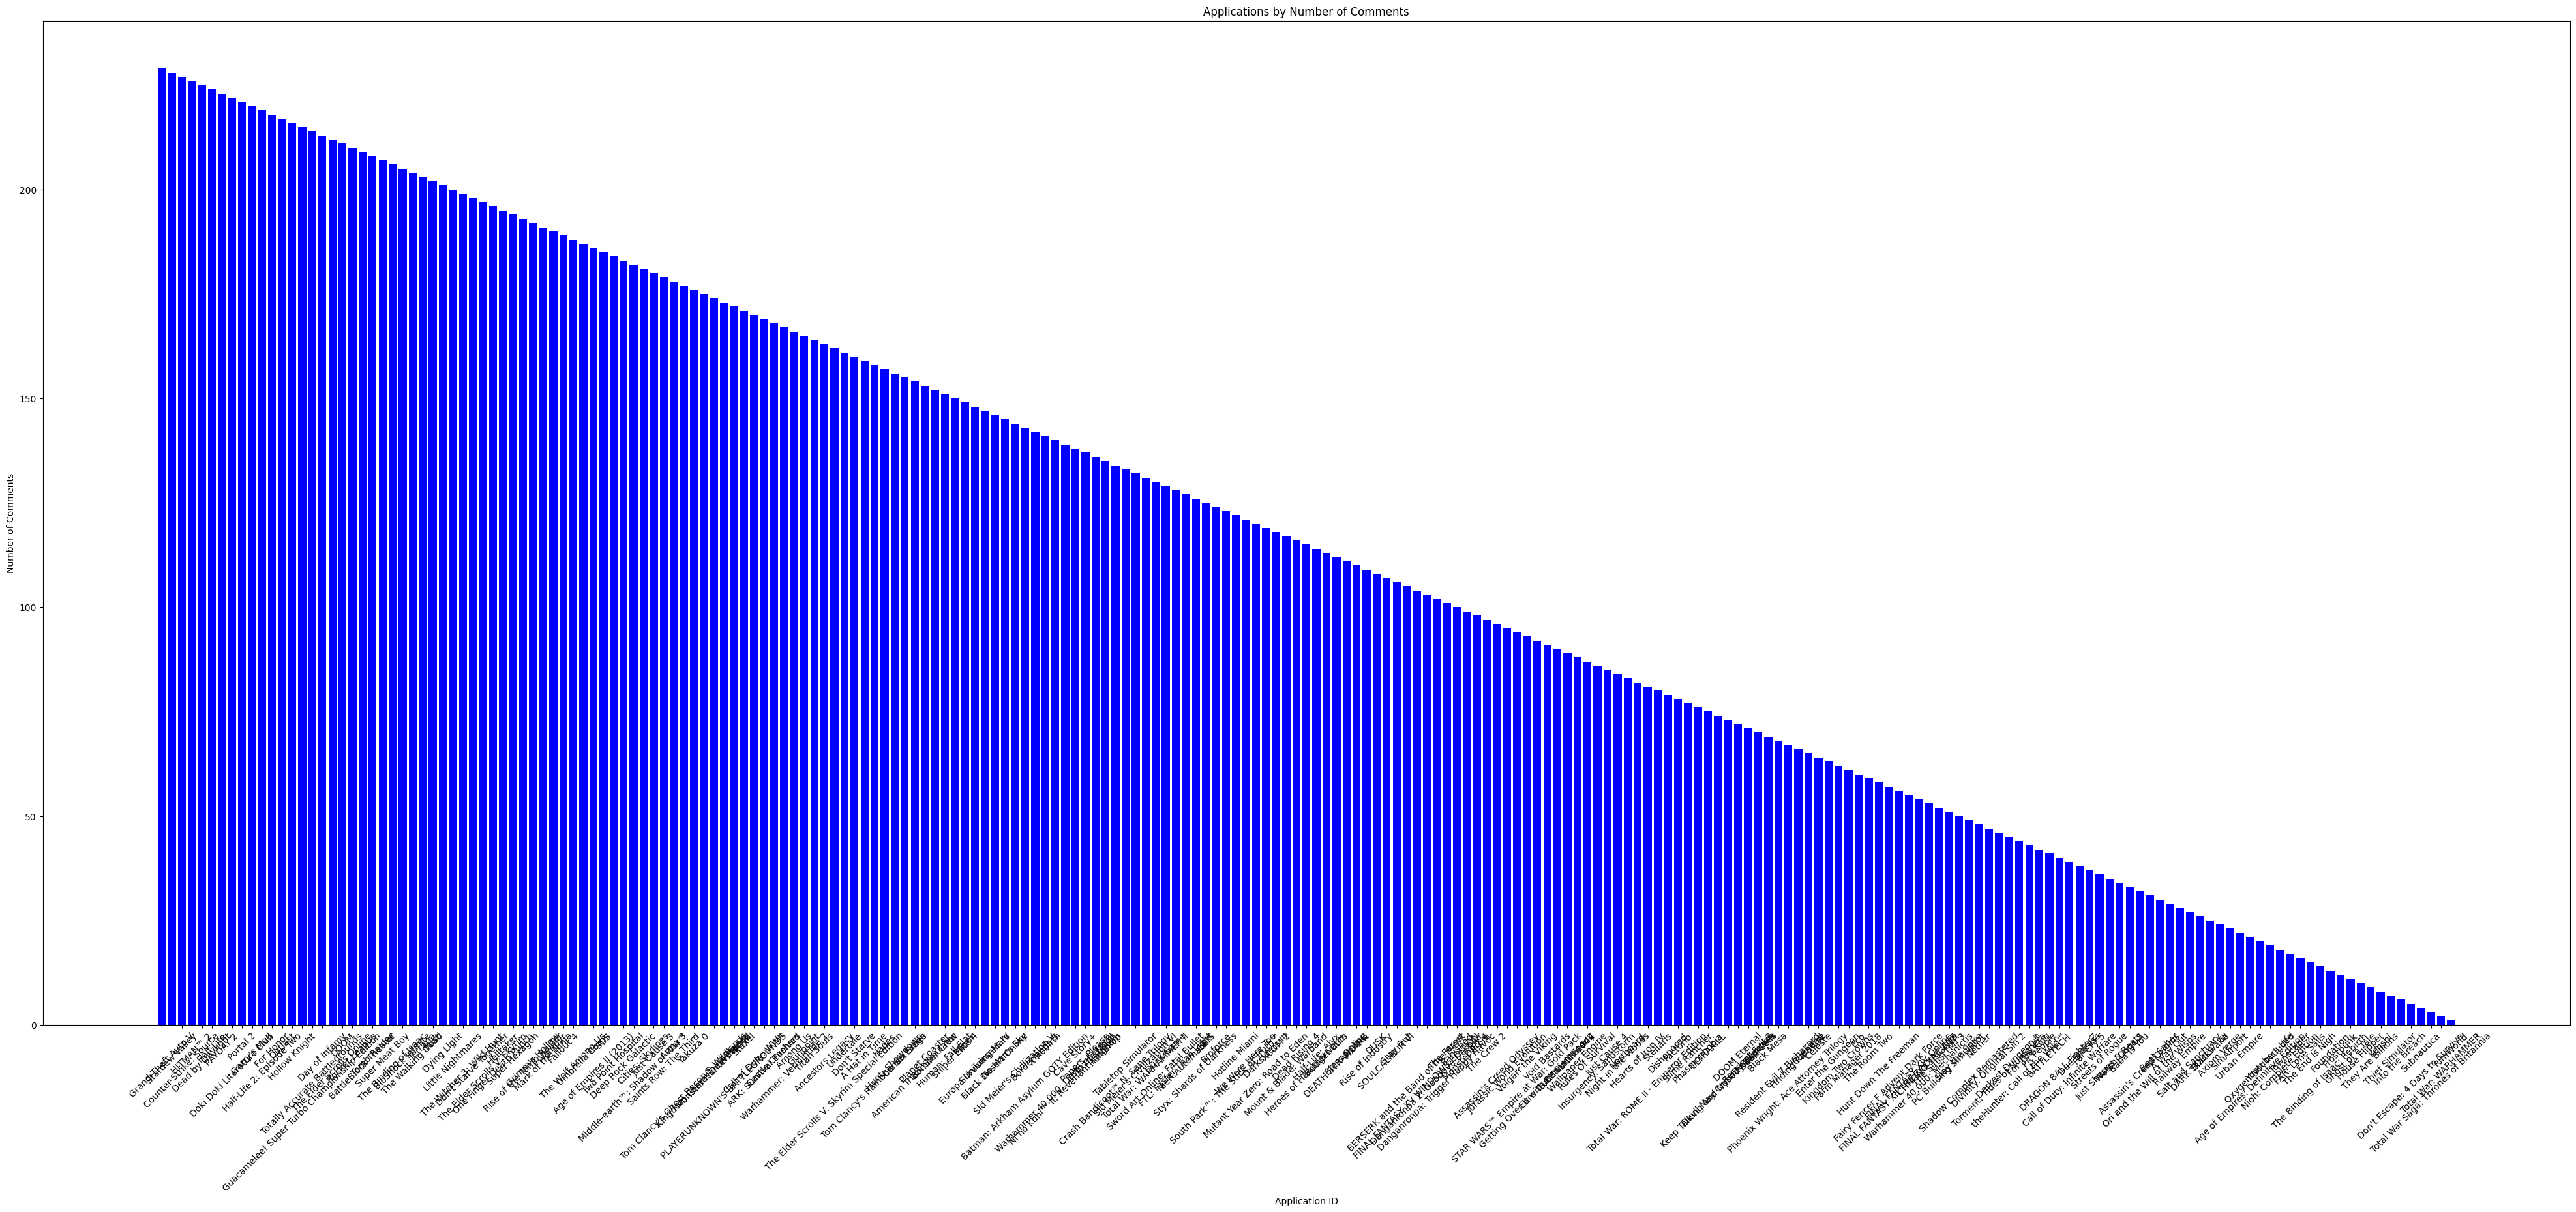

In [ ]:
# RQ5d) plotting
import matplotlib.pyplot as plt  # Correct the import to use pyplot

# Assuming df_extract is your DataFrame
plt.figure(figsize=(50, 20))
plt.bar(df_extract['app_name'], df_extract['reversed_index'], color='blue')

# Add labels and title
plt.xlabel('Application Name')
plt.ylabel('Number of Comments')
plt.title('Applications by Number of Comments')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability

# Show the plot
plt.show()


## [RQ6] Let's investigate the behavior of specific groups, specifically focusing on English and Spanish reviewers
#### Which group is more likely to edit or update their review after submitting it? “English or Spanish!”?

In [13]:
# Filter the df to only take english and spanish reviews
filtered_df = df[df['language'].isin(['english', 'spanish'])]
filtered_df

,Unnamed: 0,app_id,app_name,review_id,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,...,steam_purchase,received_for_free,written_during_early_access,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
3,3,292030,The Witcher 3: Wild Hunt,85184605,english,"One of the best RPG's of all time, worthy of a...",1611379970,1611379970,True,0,...,True,False,False,76561199054755373,5,3,5587.0,3200.0,5524.0,1.611384e+09
5,5,292030,The Witcher 3: Wild Hunt,85184171,english,"good story, good graphics. lots to do.",1611379264,1611379264,True,0,...,True,False,False,76561198170193529,11,1,823.0,823.0,823.0,1.611379e+09
6,6,292030,The Witcher 3: Wild Hunt,85184064,english,"dis gud,",1611379091,1611379091,True,0,...,True,False,False,76561198119302812,27,2,4192.0,3398.0,4192.0,1.611352e+09
9,9,292030,The Witcher 3: Wild Hunt,85182785,spanish,great game,1611377005,1611377005,True,0,...,True,False,False,76561198301724112,38,5,2399.0,333.0,2364.0,1.611379e+09
18,18,292030,The Witcher 3: Wild Hunt,85180436,english,favorite game of all time cant wait for the Ne...,1611373086,1611373086,True,0,...,True,False,False,76561198065591528,33,1,23329.0,177.0,23329.0,1.611219e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21747365,21747370,546560,Half-Life: Alyx,65645130,spanish,"Juegazo! Todo lo que diga es poco, Por favor d...",1584986707,1584986707,True,87,...,False,False,False,76561197970410091,196,16,1903.0,6.0,30.0,1.611353e+09
21747366,21747371,546560,Half-Life: Alyx,65645125,english,Holy balls,1584986704,1584986704,True,0,...,True,False,False,76561197967033932,431,7,432.0,0.0,29.0,1.586628e+09
21747367,21747372,546560,Half-Life: Alyx,65645115,english,"A tripod thing bears down on you, it looks imm...",1584986693,1584986693,True,0,...,False,False,False,76561198046495482,70,10,3296.0,15.0,24.0,1.611080e+09
21747368,21747373,546560,Half-Life: Alyx,65645100,english,Honestly this is the best vr game ever,1584986673,1584986673,True,0,...,True,False,False,76561198176379749,79,17,2654.0,0.0,34.0,1.591634e+09


In [14]:
# convert timestamp to datetime format
filtered_df['timestamp_created'] = pd.to_datetime(filtered_df['timestamp_created'])
filtered_df['timestamp_updated'] = pd.to_datetime(filtered_df['timestamp_updated'])

# create new column that says if review has been updated or not; boolean column
filtered_df['updated'] = filtered_df['timestamp_updated'] > filtered_df['timestamp_created']

# figure out who updates reviews more using mean() to make a fair comparison because the dataset contains more
# english reviews than spanish ones; mean() normalizes the sample size and allows us to compare fairly regardless of
# how many reviews each group has
result = filtered_df.groupby('language')['updated'].mean()

# returns the language with the highest mean
result.idxmax()

/var/folders/zf/wylf1g6j40g9pz8j5wtw1hhw0000gn/T/ipykernel_1246/378161719.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['timestamp_created'] = pd.to_datetime(filtered_df['timestamp_created'])
/var/folders/zf/wylf1g6j40g9pz8j5wtw1hhw0000gn/T/ipykernel_1246/378161719.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['timestamp_updated'] = pd.to_datetime(filtered_df['timestamp_updated'])
/var/folders/zf/wylf1g6j40g9pz8j5wtw1hhw0000gn/T/ipykernel_1246/378161719.py:6: SettingWithC

'english'

##### As a response to the question, after analysing the dataframe, we found that the english reviews are more likely to be updated than the spanish ones

#### Provide the average number of games that reviewers from each group have on their Steam accounts and the average number of games for which they write reviews. What can you say about the number you just calculated?

##### Average number of games that reviewers from each group have on their steam accounts

##### Finding outliers in data

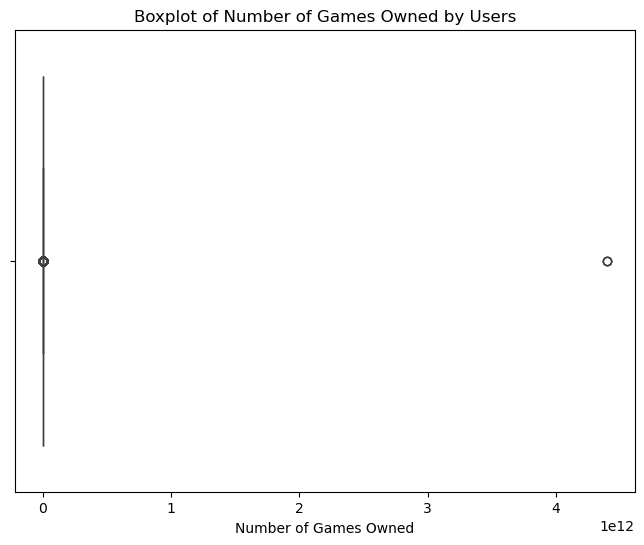

In [ ]:
# assume that the number of games owned by each user is the one of the most recent timestamp

# keep the most recent timestamp for each user
filtered_sorted_df = filtered_df.sort_values(by=['author.steamid', 'timestamp_updated'])
most_recent_games_owned = filtered_sorted_df.drop_duplicates(subset='author.steamid', keep='last')

# show boxplot that helps us understand the presence of outliers in our data
plt.figure(figsize=(8, 6))
sns.boxplot(data=most_recent_games_owned, x='author.num_games_owned')
plt.title("Boxplot of Number of Games Owned by Users")
plt.xlabel("Number of Games Owned")
plt.show()


In this figure we can notice the presence of outliers in the data (right dot), and to work around it, we consider the data to be inaccurate due to data entry errors or measurements errors, as it is very unlikely for any user to be able to own these many games. For this justifed reason, we try to exclude this data from our current analysis 

In [ ]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = most_recent_games_owned['author.num_games_owned'].quantile(0.25)
Q3 = most_recent_games_owned['author.num_games_owned'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers, 0 as lower bound because a user cannot own less than one game
lower_bound = 0
# A high multiplier only removes the most extreme cases ensuring that moderately 
# high values are not misclassified as outliers
upper_bound = Q3 + 200 * IQR
print(upper_bound, lower_bound)

# Exclude rows with outlier values
df_no_outliers = most_recent_games_owned[(most_recent_games_owned['author.num_games_owned'] >= lower_bound) & (most_recent_games_owned['author.num_games_owned'] <= upper_bound)]

df_no_outliers.sort_values(by=['author.num_games_owned'], ascending=False)


22933.0 0


,Unnamed: 0,app_id,app_name,review_id,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,...,received_for_free,written_during_early_access,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played,updated
5267135,5267136,1190460,DEATH STRANDING,72914908,english,[h1]DEATH STRANDING[/h1]\n\nBack to the origin...,1970-01-01 00:00:01.595105847,1970-01-01 00:00:01.606331425,True,87,...,False,False,76561197979911851,21980,116,4427.0,0.0,4427.0,1.597856e+09,True
8161655,8161656,812140,Assassin's Creed Odyssey,45313534,english,Its an assassins creed game. For the past 4-5y...,1970-01-01 00:00:01.539800698,1970-01-01 00:00:01.539800698,False,8,...,False,False,76561198001678750,21865,9,532.0,0.0,479.0,1.540107e+09,False
17507659,17507663,374320,DARK SOULS™ III,37318666,english,Fun.,1970-01-01 00:00:01.511525212,1970-01-01 00:00:01.511525212,True,13,...,False,False,76561197969050296,20972,3,4202.0,0.0,2123.0,1.512920e+09,False
8154176,8154177,812140,Assassin's Creed Odyssey,46914516,english,Odyssey feels like it should have come before ...,1970-01-01 00:00:01.543147513,1970-01-01 00:00:01.543147513,False,13,...,False,False,76561198037867621,20391,11,10493.0,0.0,7507.0,1.606348e+09,False
5272830,5272831,1190460,DEATH STRANDING,72728153,english,"Straight up it is a good game, feels like more...",1970-01-01 00:00:01.594814078,1970-01-01 00:00:01.594814078,True,5,...,False,False,76561197995008105,19451,21,135.0,0.0,135.0,1.603125e+09,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16626672,16626676,346110,ARK: Survival Evolved,29659867,english,The game keeps freezing will not play until th...,1970-01-01 00:00:01.486083331,1970-01-01 00:00:01.486083331,False,0,...,False,True,76561198340902162,0,2,206.0,0.0,150.0,1.486145e+09,False
19358820,19358824,218620,PAYDAY 2,22531091,english,wahy dosent work fuck fucking fuckers,1970-01-01 00:00:01.461147709,1970-01-01 00:00:01.461147709,False,2,...,False,False,76561198260953438,0,1,1720.0,0.0,1255.0,1.459420e+09,False
12700766,12700769,113200,The Binding of Isaac,441965,english,Imagine that 8-bit Link would take a trip to b...,1970-01-01 00:00:01.367051668,1970-01-01 00:00:01.367051668,True,0,...,False,False,76561197970643251,0,4,2384.0,0.0,830.0,1.603827e+09,False
12701953,12701956,113200,The Binding of Isaac,1439893,english,The most addicting and nuanced game I've ever ...,1970-01-01 00:00:01.356054705,1970-01-01 00:00:01.356054705,True,0,...,False,False,76561197993273075,0,1,16571.0,0.0,14919.0,1.464555e+09,False


In [ ]:
# sorted applications by number of reviews
num=num_reviews.sort_values( by = 'review_num', ascending = False ).reset_index(drop = True)

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

num.plot(kind='bar',
         y='review_num',  # 'app_name' is no longer on the x-axis, just the index
         color='olivedrab', 
         xlabel='Applications (index)', 
         ylabel='Reviews score', 
         title='Reviews per Application', 
         ax=axes[0]
         )


axes[0].set_xticks(range(0, len(num), 10))  # Set ticks at intervals of 10
axes[0].set_xticklabels(range(0, len(num), 10))  # Label the ticks with index numbers
axes[0].set_yticks(np.arange(0, 1.8e6, 0.2e6)) 
axes[0].set_yticklabels(['0M', '200K', '400K', '600K', '800K', '1M', '1.2M', '1.4M', '1.6M'])


# zooming in on the first and 100-th applications
num.iloc[[0,100]].plot(kind='bar',
         y='review_num',  
         color='olivedrab', 
         xlabel='Applications (index)', 
         ylabel='Reviews score', 
         title='First vs 100-th application reviews score',
         ax = axes[1])

axes[1].text(0, num['review_num'][0], num['review_num'][0], ha = 'center')
axes[1].text(1, num['review_num'][100], num['review_num'][100], ha = 'center')
axes[1].set_yticks(np.arange(0, 1.8e6, 0.2e6)) 
axes[1].set_yticklabels(['0M', '200K', '400K', '600K', '800K', '1M', '1.2M', '1.4M', '1.6M'])


plt.show()


In [31]:
# calculate average number of games owned by english and spanish users, and rounding it to integers
avg_nmbr_games = df_no_outliers.groupby('language')['author.num_games_owned'].mean().round().astype(int)

avg_nmbr_games

language
english    119
spanish     81
Name: author.num_games_owned, dtype: int64

##### average number of games for which each group of users have wrote reviews

In [ ]:
# take the each game that have reviews for each user in english language
games_reviewed_usr_eng = filtered_df[(filtered_df['language']=='english') & (filtered_df['review']!=' ')].groupby('author.steamid')['app_id'].nunique()
# take the average number of games from the calculated number above
avg_games_reviewed_usr_eng = games_reviewed_usr_eng.mean()

# take the each game that have reviews for each user in spanish language
games_reviewed_usr_sp = filtered_df[(filtered_df['language']=='spanish') & (filtered_df['review']!=' ')].groupby('author.steamid')['app_id'].nunique()
# take the average number of games from the calculated number above
avg_games_reviewed_usr_sp = games_reviewed_usr_sp.mean()

{'average number of games for which english users have wrote reviews': avg_games_reviewed_usr_eng, 
 'average number of games for which spanish users have wrote reviews':avg_games_reviewed_usr_sp }

{'average of reviews per games for english speakers': 1.8111253273458492,
 'average of reviews per games for spanish speakers': 1.6337702891715187}

## [RQ7] Let's calculate some intriguing figures.

In [ ]:
# Relevant features
columns_to_select = [
    'review_id',
    'review',
    'recommended',
    'votes_helpful',
    'author.num_games_owned',
    'author.num_reviews',
    'author.steamid'
]

review_df = df[columns_to_select]

In [1]:
# Histogram plot

# sns.set(style="whitegrid")

# Plot the distribution of votes_helpful with larger bin size
plt.figure(figsize=(12, 6))

sns.histplot(review_df['votes_helpful'], bins=500, kde=True)
plt.yscale('log')  # Log scale for y-axis to better visualize

plt.title('Distribution of Helpful Votes')
plt.xlabel('Helpful Votes')
plt.ylabel('Frequency (Log Scale)')
plt.grid(True)

plt.show()

Here we can see a wide variation of helpful votes, indicating outliers in the dataset. Therefore let's try to take out the outliers.

In [ ]:
# Calculate the IQR for the 'votes_helpful' column
Q1 = review_df['votes_helpful'].quantile(0.25)
Q3 = review_df['votes_helpful'].quantile(0.75)
IQR = Q3 - Q1

# Define the upper bounds
upper_bound = Q3 + 1.5 * IQR

# Filter out only the exaggerated outliers
filtered__review_df = review_df[(review_df['votes_helpful'] <= upper_bound)]

# Print the number of rows after removing outliers
print(f'Total rows after removing exaggerated outliers: {len(filtered__review_df)}')




Using the interquartile range with constant 1.5 commonly used threshold makes all the votes helpful with value more than 2 as outliers. Therefore let's assume a specific value directly as the upper bound.

In [ ]:
# Define the upper bounds
upper_bound = 100

# Filter out only the exaggerated outliers
filtered__review_df = review_df[(final_df['votes_helpful'] <= upper_bound)]

# Print the number of rows after removing outliers
print(f'Total rows after removing exaggerated outliers: {len(filtered__review_df)}')




In [ ]:
# Define bins and labels
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100']

filtered__review_df.loc[:, 'votes_helpful_binned'] = pd.cut(filtered__review_df['votes_helpful'], bins=bins, labels=labels, right=False)

# Frequency of each bin
votes_counts = filtered__review_df['votes_helpful_binned'].value_counts().sort_index()

# Define the figure and axis
fig, ax = plt.subplots(figsize=(8, 8))

# Plot the pie chart
wedges, _ = ax.pie(
    votes_counts,
    startangle=140,
    wedgeprops=dict(width=1)  
)

# Labels and percentages
legend_labels = [f'{label}: {count} ({100 * count / sum(votes_counts):.1f}%)' 
                 for label, count in zip(votes_counts.index, votes_counts)]
ax.legend(wedges, legend_labels, title="Votes Helpful", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.title('Distribution of Helpful Votes')
plt.show()

Based on the distribution of helpful votes in the above piechart the summary of the distribution is provided below: 


0 - 10 helpful votes : 98.2 % of the total helpful votes, this bin has the highest frequency, this indicates majority of the reviews recieved very few helpful votes. 

10 - 20 votes : 0.9% of the total helpful votes, this also indicates small number of reviews perceived as more helpful.

20 - 30 votes : 0.3% of the total helpful votes, this indicates a sharp decline in votes as we move up the scale.

30 - 40 votes : 0.2% of the total helpful votes, here votes continue to decline 

40 - 50 votes : 0.1% of the total votes, the downward trend continues here as well.

50 - 60 votes : 0.1% of the total votes, indicating a continued decline.

60 - 70 votes: 0.1% of the total votes, very few votes for the review here as  well.

70 - 100 : very few reviewes reach this high level of helpfulness.

#### What is the probability of submitting a review and receiving at least one helpful vote from other users?

In [ ]:
# non-empty reviews
tot_num_reviews = (filtered__review_df['review'] != ' ').sum()

In [ ]:
# review with votes
review_with_vote = (filtered__review_df['votes_helpful'] > 0).sum()

In [ ]:
p = review_with_vote / tot_num_reviews
p

This result indicates that if we randomly pick a review, there's a 27.9% chance that it got at least one helpful vote from users.

#### What is the probability of submitting a review and receiving at least one helpful vote from other users, given that you don’t recommend the app?

In [ ]:
# non-recommend review vote
non_recommend_review_vote = ((filtered__review_df['review'] != ' ') & (filtered__review_df['recommended'] == False) & (filtered__review_df['votes_helpful'] > 0)).sum()

In [ ]:
# total non-recommended reviews
tot_non_recommend_reviews = ((filtered__review_df['review'] != ' ') & (filtered__review_df['recommended'] == False)).sum()

In [ ]:
p2 = non_recommend_review_vote / tot_non_recommend_reviews
p2

The result indicates that if we take a non-recommended review there's 48.1% chance that it got at least one helpful vote from other users. This shows that even if users don't recommend the app,nearly half of those reviews  can still be seen as helpful by others.

#### Is the probability of “a review receiving at least one helpful vote” independent of the probability that “the reviewer has submitted at least five reviews before the current review”? Elaborate on it.

In [ ]:
grouped_df = filtered__review_df.groupby(['author.steamid']).agg(
    votes_helpful=('votes_helpful', 'mean'),
    num_reviews=('author.num_reviews', 'first'),
    review=('review', 'first')
).reset_index()

In [ ]:
p_a = grouped_df[grouped_df['votes_helpful'] > 0].shape[0] / grouped_df[grouped_df['review'] != ' '].shape[0]
p_a

The result indicates that 32% of all authors that has given a review recieve helpful votes.

In [ ]:
num_reviws_at_least_five = grouped_df[grouped_df['num_reviews'] >= 5]['author.steamid'].nunique()
total_reviewers = grouped_df['author.steamid'].nunique()
p_b = num_reviws_at_least_five / total_reviewers
p_b

21.9 %  of the author has submitted at least five reviews.

In [ ]:
p_a_p_b = grouped_df[(grouped_df['votes_helpful'] > 0) & (grouped_df['num_reviews'] >= 5)].shape[0] / grouped_df.shape[0]

In [ ]:
is_independent = p_a_p_b == (p_a * p_b)

In [ ]:
print(f"P(A): {p_a}")
print(f"P(B): {p_b}")
print(f"P(A ∩ B): {p_a_p_b}")
print(f"Are A and B independent? {'Yes' if is_independent else 'No'}")

P(A) : Probability that a review receives at least one helpful vote

P(B) : Probability that the reviewer has submitted at least five review
s

$ P(A) \times P(B) $ : Probility that author submitted at least 5 reviews and at least one review receiving at least one helpful vote

If two events A and B are independent, it must satisfy the below condition :

$  P(A \cap B) = P(A) \times P(B)  $ 

In the case of the question we are interested in, an author submitting at least five reviews in which the review receives at least one helpful vote.

P(A) = 0.32

P(B) = 0.22

$  P(A \cap B) = 0.13  $ 

$ 0.13  \neq  0.32 \times 0.22 $

$ 0.13  \neq  0.07 $

The two events are dependent, author's reviewing experience ( total number of reviews ) likely influences how their reviews are perceived and rated by otheres in terms of helpfulness.


#### We hypothesize that “reviewers who own a larger number of games are likely to leave fewer reviews on the platform.” Please validate or refute this statement through statistical analysis.

In [ ]:
grouped_df = filtered__review_df.groupby(['author.steamid']).agg(
    games_owned=('author.num_games_owned', 'sum'),
    num_reviews=('author.num_reviews', 'first')
).reset_index()

In [ ]:
# Remove exaggerated num of revies and num of games owned using
# quantile method

Q1_games_owned = grouped_df['games_owned'].quantile(0.25)
Q3_games_owned = grouped_df['games_owned'].quantile(0.75)
IQR_games_owned = Q3_games_owned - Q1_games_owned

upper_bound_games_owned = Q3_games_owned + 1.5 * IQR_games_owned

# For 'num_reviews'
Q1_num_reviews = grouped_df['num_reviews'].quantile(0.25)
Q3_num_reviews = grouped_df['num_reviews'].quantile(0.75)
IQR_num_reviews = Q3_num_reviews - Q1_num_reviews

upper_bound_num_reviews = Q3_num_reviews + 1.5 * IQR_num_reviews

# Filter the DataFrame to remove outliers in both 'games_owned' and 'num_reviews'
author_games = grouped_df[
    (grouped_df['games_owned'] <= upper_bound_games_owned) &
    (grouped_df['num_reviews'] <= upper_bound_num_reviews)
]



In [ ]:
# correlation analysis
correlation, p_value = pearsonr(author_games['games_owned'], author_games['num_reviews'])
print(f"Pearson Correlation between games_owned and num_reviews: {correlation:.2f}, p-value: {p_value:.2e}")

Null Hypothesis ( $H_0$ ) : there is no correlation between the number of games owned and the number of reviews.

Alternative Hypothesis ( $H_a$ ) : there is a correlation between the number of games owned and the number of reviews.

A correlation of 0.45 suggests a moderate positive correlation between games owned and number of reviews. This means that as the number of games owned increases, the number of reviews tend to increase as well, but this is not a very strong correlation.

p-value of 0.0 as it is less than 0.05 suggests that the correlation is statistically significant.

Therefore in conclustion we refute the null hypothesis based on the correlation analysis.


In [ ]:
# Linear Regression Analysis
X = sample_data['games_owned']
y = sample_data['num_reviews']
X = sm.add_constant(X)  

model = sm.OLS(y, X).fit()
print(model.summary())

There is a statistically significant positive relationship between the number of games owned and the number of reviews submitted.  The coefficient for ``games_owned`` (0.0129) suggests that the increase in reviews per additional game owned is small. 

However. the relatively low r-squared value indicates that while there is a significant relationship, many other factors are likely influencing the number of reviews.

#### Ask an LLM tool (such as ChatGPT, Claude AI, Gemini, Perplexity, etc.) to understand the purposes of histograms, bar plots, scatterplots, and pie charts and what kind of insights they offer that might be useful for statistical analysis. Are those results trustworthy, or can you do something to improve somehow the confidence in the suggestions given by the LLM?

Histograms are used to display the distribution of a continuous variable by grouping data into bins and showing how many data points fall within each bin.

Bar plots are used to compare categorical data. Each category or group has a bar whose height represents its value or frequency.

Scatterplots display the relationship between two continuous variables, with each point representing a data pair.

Pie charts show the proportions of a whole, with each "slice" representing a category’s contribution to the total.


Based on this LLM answer histograms are essential for understanding the distribution and central  tendencies of continuous variable. It allows to identify skewness and outliers to determine appropriate statistical tests for normally distributed  or skewed distributed data.


Bar plots aid in hypothesis testing to check for significan differences between groups using ANOVA or chi-square tests, based on insights from observed category differences in the bar plot.

Scatter plotss highlight correlations or trends between two continuous variables, it reveals linear or non-linear relationships


piecharts anlyzes catgorical data's relative frequencies.


LLM gives analysis in a general context therefore the insights offered might not be accurate as it needs domain specific analysis, therefore on top of the LLM analyis it is important to have understanding of the feautures of the dataset as it helps make modification on the LLM suggestions to improve accuraccy.

## BONUS Question

In [ ]:
#generally they're already there but in any case do:
# !pip install nltk 
# !pip install --user nltk
# !pip install transformers

import nltk
import re
import torch
from nltk.tokenize import word_tokenize
from transformers import pipeline 

In [ ]:
# select top 3 languages

top_3_lan = df['language'].value_counts().head(3).index
df_top_3_languages = df[df['language'].isin(top_3_lan)]
top_3_lan

Preproceesing Review Text

In [ ]:
# Load the Stopwords Data from the stopword-iso multilangual list

import json

with open('dataset\stopwords-iso.json', 'r', encoding='utf-8') as f:
    stopwords_data = json.load(f)

# Extract stopwords for specific languages
stop_words_en = set(stopwords_data.get("en", []))
stop_words_ru = set(stopwords_data.get("ru", []))
stop_words_zh = set(stopwords_data.get("zh", [])) 

In [ ]:
# Defining a function to clean the content of the reviews

def clean_text(text, language):
    if not isinstance(text, str):  # Check if text is a string
        return ""  # Return an empty string to ignore float/Nan reviews

    # selecting language based stopwords
    if language == 'english':
        stop_words = stop_words_en
    elif language == 'russian':
        stop_words = stop_words_ru
    elif language == 'schinese':
        stop_words = stop_words_zh
    else:
        return text
    
     # Remove special characters
    text = re.sub(r'[^\w\s]', '', text)

    # Lowercase text
    text = text.lower()
    
    # Tokenize and remove stopwords
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

In [ ]:
df_top_3_languages['cleaned_review'] = df_top_3_languages.apply(
    lambda row: clean_text(row['review'], row['language']), axis=1
)

In [ ]:
# check

df_top_3_languages['cleaned_review'][:10]

In [ ]:
#sentiment analysis pipelines

english_sentiment = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english")
russian_sentiment = pipeline("sentiment-analysis", model="blanchefort/rubert-base-cased-sentiment")
chinese_sentiment = pipeline("sentiment-analysis", model="hfl/chinese-roberta-wwm-ext")

def analyze_sentiment_batch(reviews, languages):
        sentiments = []

        for lang, review in zip(languages, reviews):
            try:
                if lang == 'english':
                    result = english_sentiment(review)[0]
                    sentiments.append(result['label'])
                elif lang == 'schinese':
                    result = chinese_sentiment(review)[0]
                    sentiments.append('positive' if result['label'] == 'POSITIVE' else 'negative')
                elif lang == 'russian':
                    result = russian_sentiment(review)[0]
                    sentiments.append('positive' if result['label'] == 'positive' else 'negative')
                else:
                    sentiments.append('neutral')
                    
            except Exception as e:
                sentiments.append('neutral')
                
                
        return sentiments

In [ ]:
# Perform batch sentiment analysis

df_top_3_languages['sentiment'] = analyze_sentiment_batch(
    df_top_3_languages['cleaned_review'].tolist(),
    df_top_3_languages['language'].tolist()
)

## AQ Question

In [ ]:

# n - is a starting number
# k - is the number of arguments
# arr - is a list of arguments which give n
# eo - is a list of even and odd numbers
memo=dict()
global_count=0
global_array=None
def recursion(n,k,arr,eo):
    global global_count
    global global_array
    # we have this value in memo
    if tuple([n,k,eo]) in memo and memo[tuple([n,k,eo])]==set(arr):
        return memo[(n,k,eo)]
    # we don't have this value in memo
    else:
        memo[tuple([n,k,eo])]=set(arr)
    # if one of two is negative
    if n<0 or k<0:
        return 
    # base case 4 we found the answer
    if k==0 and n==0:
        global_array=arr.copy()
        global_count+= 1
        return 
    if arr==[]:
        for i in range(n,0,-1):
            arr.append(i)
            if i %2==0:
                recursion(n-i,k-1,arr,True)
            else:  
                recursion(n-i,k-1,arr,False)
            arr.pop()
            if global_count>0:
                return
    else:
        for i in range(n if (n % 2 == 0 and arr[-1]%2==0) or (n % 2 == 1 and arr[-1]%2==1) else n-1,0,-2):
            if eo:
                if i%2==0:
                    arr.append(i)
                    recursion(n-i,k-1,arr,eo)
                    arr.pop()
            else:
                if i%2!=0:
                    arr.append(i)
                    recursion(n-i,k-1,arr,eo)
                    arr.pop()
            if global_count>0:
                return

if __name__=='__main__':
    status_arr=[]
    final_arr=[]
    lines_input=int(input())-1
    for i in range(lines_input):
        n,k=map(int,input().split())
        arr=[]
        global_count=0
        global_array=None
        if n%2==0:
            eo=True
        else:
            eo=False
        recursion(n,k,arr,eo)
        if global_count>0:
            status_arr.append("YES")
            final_arr.append(global_array)
        else:
            status_arr.append("NO")
            final_arr.append([])
        global_count=0
        global_array=None
    for i in range(len(status_arr)):
        print(status_arr[i])
        if len(final_arr[i])>0:
            print(*final_arr[i])  

### Analysis of Code Time Complexity

The most computationally expensive part of the code is<br> the iteration `for i in range(n if (n % 2 == 0 and arr[-1]%2==0) or (n % 2 == 1 and arr[-1]%2==1) else n-1,0,-2)`,<br> which is called `k` times. Additionally, each of the `n` numbers triggers recursion `k` times at each level. Therefore, the worst-case time complexity should be `O((n/2)^k)` for each input line. The rest of the code does not have a significant impact on the overall complexity.<br><br>

The implementation of memoization can reduce this cost O(n/2*k). This is because there are no repeated calculations for the same input values. If we have already calculated values for the same input, the cost is reduced.



### CHATGPT
The answer is almost the same:<br>
Big O Conclusion:
Without Memoization: In the worst case, where memoization doesn't help much, the time complexity is `O(n^k)`, as the function iterates over n elements and <br>recurses `k` times.
With Memoization: Memoization reduces the number of recursive calls, but in the worst case, the complexity is `O(n * k * 2) = O(n * k)`.<br> This is because each tuple `(n, k, eo)` can only be computed once.<br>
Actually, it is not exactly the same due to the division by 2. I am not only considering odd values if I already have a value in the array (whether it’s odd or even).

